# Script to validate predicted structures against another set

In [2]:
from openfold.np import protein
from openfold.data import mmcif_parsing
from openfold.data.data_pipeline import make_pdb_features, make_mmcif_features

In [3]:
ESMFold_CAMEO_dir = "/fsx/validation_set_esmfold_cameo/"

In [5]:
import os
import torch

In [11]:
ground_truth_dict = {}
for protein_name in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
    mmcif_id, chain_id = os.path.splitext(protein_name)[0].split("_")
    with open(os.path.join(ESMFold_CAMEO_dir, 'mmcif_files', mmcif_id+'.cif'), 'r') as f:
        mmcif_string = f.read()
    mmcif_object = mmcif_parsing.parse(file_id=mmcif_id, mmcif_string=mmcif_string)
    protein_features = make_mmcif_features(mmcif_object.mmcif_object, chain_id)
    protein_features['all_atom_positions'] = torch.tensor(protein_features['all_atom_positions'])
    protein_features['all_atom_mask'] = torch.tensor(protein_features['all_atom_mask'])
    ground_truth_dict[mmcif_id+'_'+chain_id] = protein_features

In [12]:
# Let's see what ground_truth_dict has
print(len(ground_truth_dict))
list(ground_truth_dict.items())[0]

194


('7CTX_B',
 {'aatype': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
  'between_segment_residues': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
# Now let's get the predicted features
import numpy
import torch
predictions = {}
# The os.listdir hack in below line is only because some files have not been processed yet (prediction is still running!)
for protein_name_fasta in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
    protein_name = os.path.splitext(protein_name_fasta)[0]
    mmcif_id, chain_id = protein_name.split("_")
    # Pick the predicted pdb and the other features from the predictions folder
    try:
        with open(os.path.join(ESMFold_CAMEO_dir, 'predictions', 'predictions', protein_name+'_model_1_epoch_35-35999_out_data_for_metrics.npz'), 'rb') as in_file:
            data = numpy.load(in_file)
            predictions[protein_name] = {'final_atom_positions': torch.tensor(data["out_final_atom_pos"]),
                                         'final_atom_mask': torch.tensor(data["out_final_atom_mask"])}
    except FileNotFoundError as e:
        print("FileNotFoundError: "+protein_name)
        continue

In [10]:
print(len(predictions))
list(predictions.items())[1]

194


('7RKC_A',
 {'final_atom_positions': tensor([[[ -0.6374,  -2.2827,  24.1276],
           [ -2.0443,  -2.4180,  23.7645],
           [ -2.6524,  -1.0688,  23.3964],
           ...,
           [ -0.0000,  -0.0000,   0.0000],
           [ -0.0000,  -0.0000,   0.0000],
           [ -0.0000,  -0.0000,   0.0000]],
  
          [[ -2.7975,  -1.0414,  23.9401],
           [ -3.5083,   0.1656,  23.5495],
           [ -4.9367,  -0.0982,  23.1122],
           ...,
           [ -0.0000,  -0.0000,   0.0000],
           [ -0.0000,  -0.0000,   0.0000],
           [ -0.0000,  -0.0000,   0.0000]],
  
          [[ -4.8596,   1.1177,  23.6258],
           [ -6.2837,   1.0282,  23.3206],
           [ -6.5237,   0.9638,  21.8160],
           ...,
           [ -0.0000,   0.0000,   0.0000],
           [ -0.0000,   0.0000,   0.0000],
           [ -0.0000,   0.0000,   0.0000]],
  
          ...,
  
          [[ 21.3047,  12.6108, -11.0652],
           [ 22.3486,  11.9645, -10.2765],
           [ 23.6463,  11.8

In [11]:
# Now, finally let's compare metrics
import train_openfold

In [13]:
# for protein_name_fasta in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
#     protein_name = os.path.splitext(protein_name_fasta)[0]
import torch
from tmtools import tm_align
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
dummy_config = dotdict({"config": dotdict({"globals": dotdict({"eps": 1e-8})})})
metrics_per_protein = {}
lddt_ca = torch.tensor(0.)
drmsd_ca = torch.tensor(0.)
alignment_rmsd = torch.tensor(0.)
gdt_ts = torch.tensor(0.)
gdt_ha = torch.tensor(0.)
for protein_name in predictions:
    metrics_for_protein = train_openfold.OpenFoldWrapper._compute_validation_metrics(dummy_config,
                                                           ground_truth_dict[protein_name],
                                                           predictions[protein_name],
                                                           superimposition_metrics=True
                                                              )
    metrics_per_protein[protein_name] = metrics_for_protein
    lddt_ca += metrics_for_protein['lddt_ca']
    drmsd_ca += metrics_for_protein['drmsd_ca']
    alignment_rmsd += metrics_for_protein['alignment_rmsd']
    gdt_ts += metrics_for_protein['gdt_ts']
    gdt_ha += metrics_for_protein['gdt_ha']
print(f"For {len(predictions)} proteins: ")
print({'lddt_ca': lddt_ca/len(predictions), 'drmsd_ca': drmsd_ca/len(predictions), 
       'alignment_rmsd': alignment_rmsd/len(predictions), 'gdt_ts': gdt_ts/len(predictions),
       'gdt_ha': gdt_ha/len(predictions)
       })

For 194 proteins: 
{'lddt_ca': tensor(0.7695), 'drmsd_ca': tensor(4.8303), 'alignment_rmsd': tensor(6.6397), 'gdt_ts': tensor(0.5292), 'gdt_ha': tensor(0.3539)}


## Metrics from 'without template predictions'
```
For 194 proteins: 
{'lddt_ca': tensor(0.7695), 'drmsd_ca': tensor(4.8303), 'alignment_rmsd': tensor(6.6397), 'gdt_ts': tensor(0.5292), 'gdt_ha': tensor(0.3539)}
```

## Metrics from 'with template predictions'
```
For 194 proteins: 
{'lddt_ca': tensor(0.8397), 'drmsd_ca': tensor(3.7080), 'alignment_rmsd': tensor(4.9194), 'gdt_ts': tensor(0.6515), 'gdt_ha': tensor(0.4782)}
```

In [14]:
from tmtools import tm_align
from tmtools.io import get_structure, get_residue_data
tm_norm_chain1_sum = 0
tm_norm_chain2_sum = 0
for protein_name in predictions:
    p_truth = get_structure(os.path.join(ESMFold_CAMEO_dir, 'pdb_files', f'{protein_name}.pdb'))
    p_pred = get_structure(os.path.join(ESMFold_CAMEO_dir, 'predictions', 'predictions', f'{protein_name}_model_1_epoch_35-35999_unrelaxed.pdb'))
    p_truth_data = get_residue_data(next(p_truth.get_chains()))
    p_pred_data = get_residue_data(next(p_pred.get_chains()))
    p_score = tm_align(p_truth_data[0], p_pred_data[0], p_truth_data[1], p_pred_data[1])
    metrics_per_protein[protein_name] = {'tm_norm_chain1': p_score.tm_norm_chain1, 
                                         'tm_norm_chain2': p_score.tm_norm_chain2}
    tm_norm_chain1_sum += p_score.tm_norm_chain1
    tm_norm_chain2_sum += p_score.tm_norm_chain2
print({'tm_norm_chain1': tm_norm_chain1_sum/len(predictions), 'tm_norm_chain2': tm_norm_chain2_sum/len(predictions)})
#          ground_truth_dict['7B8B_A']['all_atom_positions'].numpy(), 
#          ground_truth_dict['7B8B_A']['sequence'][0].decode('utf-8'),
#          ground_truth_dict['7B8B_A']['sequence'][0].decode('utf-8'))
# ground_truth_dict['7B8B_A']['sequence'][0].decode('utf-8')
# predictions['7B8B_A']['final_atom_positions'].shape

{'tm_norm_chain1': 0.7616409467647376, 'tm_norm_chain2': 0.705653682296295}


In [103]:
metrics_per_protein['7B8B_A']

{'lddt_ca': tensor(0.8754),
 'drmsd_ca': tensor(1.2523),
 'alignment_rmsd': tensor(1.8002),
 'gdt_ts': tensor(0.8767),
 'gdt_ha': tensor(0.7019)}

## Second method of TM score calculation
From https://github.com/Dapid/tmscoring/blob/master/tmscoring/tmscore.py

In [8]:
import tmscoring
def compute_tm_score(pdb1_path, pdb2_path):
    alignment = tmscoring.TMscoring(pdb1_path, pdb2_path)
    
    # Find the optimal alignment
    alignment.optimise()
    
    # Get the TM score:
    return alignment.tmscore(**alignment.get_current_values()), \
            alignment.rmsd(**alignment.get_current_values())

In [51]:
tm_score_sum = 0.
rmsd_score_sum = 0.
for protein_fa in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
    protein_name = os.path.splitext(protein_fa)[0]
    pred_path = os.path.join(ESMFold_CAMEO_dir, 'predictions_with_templates', 'predictions', f'{protein_name}_model_1_epoch_35-35999_unrelaxed.pdb')
    truth_path = os.path.join(ESMFold_CAMEO_dir, 'pdb_files', f'{protein_name}.pdb')
    tm_score, rmsd_score = compute_tm_score(pred_path, truth_path)
    metrics_per_protein[protein_name].update({'tm_score': tm_score})
    tm_score_sum += tm_score
    rmsd_score_sum += rmsd_score
print({'tm_score': tm_score_sum/len(predictions)})
print({'rmsd_score': rmsd_score_sum/len(predictions)})

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

{'tm_score': 0.74465349063627}
{'rmsd_score': 3.688524166119866}


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


In [34]:
def test_compute_tm_score():
    protein_name = '7EGT_B'
    tmscore, tmscore_sample = compute_tm_score(os.path.join(ESMFold_CAMEO_dir, 'predictions_with_templates', 'predictions', f'{protein_name}_model_1_epoch_35-35999_unrelaxed.pdb'),
                     os.path.join(ESMFold_CAMEO_dir, 'pdb_files', f'{protein_name}.pdb'))
    print(tmscore, tmscore_sample)
    print(len(tmscore_sample))
test_compute_tm_score()

0.14181620534209494 [0.058299   0.04003146 0.04128585 0.06448809 0.15414732 0.28469977
 0.43976427 0.26025837 0.21235645 0.1361107  0.07947046 0.05371696
 0.06612001 0.08876513 0.08032934 0.07805482 0.06190508 0.03123821
 0.02528273 0.02705749 0.01894543 0.01982186 0.03033238 0.03239005
 0.03905912 0.03227135 0.04628394 0.03468152 0.0397937  0.02898619
 0.02272186 0.02311268 0.02128867 0.02409935 0.03190906 0.03156236
 0.05578837 0.05746181 0.07697655 0.06829072 0.18322772 0.36740091
 0.68024767 0.73828832 0.52873336 0.65157999 0.49672516]
47


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


!!! I seriously doubt the accuracy of this TM scorer at this point. Seeing such a small, perfectly aligned protein giving a TM-score is 0.141 is suspicious. !!!

In [54]:
def compute_tm_score_for_openfold():
    tm_score_sum = 0.
    rmsd_score_sum = 0.
    for protein_fa in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
        protein_name = os.path.splitext(protein_fa)[0]
#         pred_path = os.path.join(ESMFold_CAMEO_dir, 'openfold_predictions_without_msas', 'predictions', f'{protein_name}_model_1_OF_weights_init_training_no_msas_unrelaxed.pdb')
#         pred_path = os.path.join(ESMFold_CAMEO_dir, 'openfold_predictions_with_msas', 'predictions', f'{protein_name}_model_1_openfold_weights_init_training_unrelaxed.pdb')
        pred_path = os.path.join(ESMFold_CAMEO_dir, 'openfold_predictions_finetuning5_with_msas', 'predictions', f'{protein_name}_model_1_OF_weights_finetuning5_with_msas_unrelaxed.pdb')
        truth_path = os.path.join(ESMFold_CAMEO_dir, 'pdb_files', f'{protein_name}.pdb')
        tm_score, rmsd_score = compute_tm_score(pred_path, truth_path)
        metrics_per_protein[protein_name].update({'tm_score': tm_score, 'non_OF_rmsd_score': rmsd_score})
        tm_score_sum += tm_score
        rmsd_score_sum += rmsd_score
    print({'tm_score': tm_score_sum/len(predictions)})
    print({'non_OF_rmsd_score': rmsd_score_sum/len(predictions)})
compute_tm_score_for_openfold()

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

{'tm_score': 0.7819016497655019}
{'non_OF_rmsd_score': 2.9168240777266674}


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


```python
# Openfold ESM1-b without templates
{'tm_score': 0.6943236463669534}
{'rmsd_score': 4.592503567947784}

# Openfold ESM1-b with templates
{'tm_score': 0.74465349063627}
{'rmsd_score': 3.688524166119866}

# Openfold Init training without msas
{'tm_score': 0.25007151888263374}
{'rmsd_score': 10.875585534694181}

# Init training weights with msas
{'tm_score': 0.8024455661783559}
{'rmsd_score': 2.6605858091507786}

# Finetuned2 weights with msas
{'tm_score': 0.7964652213567348}
{'rmsd_score': 2.6925024881700304}

# Finetuned5 weights with msas
{'tm_score': 0.7819016497655019}
{'non_OF_rmsd_score': 2.9168240777266674}
```

In [82]:
# Create a chart
import matplotlib.pyplot as plt
import matplotlib

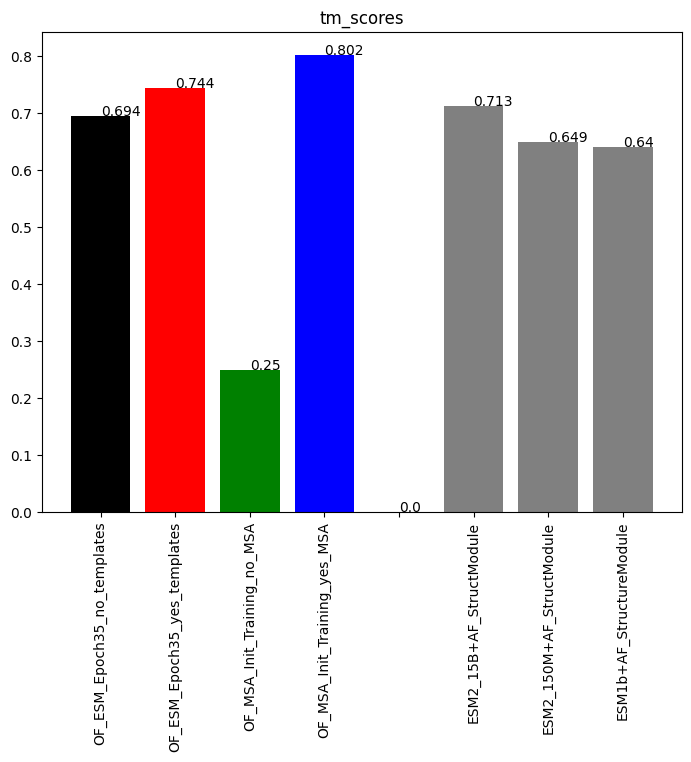

In [99]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['OF_ESM_Epoch35_no_templates', 'OF_ESM_Epoch35_yes_templates', 'OF_MSA_Init_Training_no_MSA', 'OF_MSA_Init_Training_yes_MSA', '', 'ESM2_15B+AF_StructModule', 'ESM2_150M+AF_StructModule', 'ESM1b+AF_StructureModule']
model_tm_scores = [0.694, 0.744, 0.250, 0.802, 0.0, 0.713, 0.649, 0.64]
ax.bar(range(len(models)), model_tm_scores, color=['black', 'red', 'green', 'blue', 'cyan', 'grey', 'grey', 'grey'])
plt.xticks(range(len(models)), models, rotation='vertical')
plt.title("tm_scores")
for index, value in enumerate(model_tm_scores):
    plt.text(index, value, str(value))
plt.show()

In [14]:
# Now let's get the predicted features
import numpy
import torch
def get_predictions_dict(pred_dir_path):
    predictions = {}
    # The os.listdir hack in below line is only because some files have not been processed yet (prediction is still running!)
    for protein_name_fasta in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
        protein_name = os.path.splitext(protein_name_fasta)[0]
        mmcif_id, chain_id = protein_name.split("_")
        # Pick the predicted pdb and the other features from the predictions folder
        try:
            with open(os.path.join(pred_dir_path, 'predictions', protein_name+'_model_1_epoch_35-35999_out_data_for_metrics.npz'), 'rb') as in_file:
                data = numpy.load(in_file)
                predictions[protein_name] = {'final_atom_positions': torch.tensor(data["out_final_atom_pos"]),
                                             'final_atom_mask': torch.tensor(data["out_final_atom_mask"])}
        except FileNotFoundError as e:
            print("FileNotFoundError: "+protein_name)
            continue
predictions_epoch63 = get_predictions_dict(os.path.join(ESMFold_CAMEO_dir, 'OF_predictions_epoch_62-62999_with_templates'))

FileNotFoundError: 7CTX_B
FileNotFoundError: 7RKC_A
FileNotFoundError: 7VRS_A
FileNotFoundError: 7ER0_A
FileNotFoundError: 7VU7_A
FileNotFoundError: 7OHZ_B
FileNotFoundError: 7U5O_C
FileNotFoundError: 7MNY_D
FileNotFoundError: 7VNX_A
FileNotFoundError: 7U2R_A
FileNotFoundError: 7X0D_A
FileNotFoundError: 7QQA_A
FileNotFoundError: 7X9E_A
FileNotFoundError: 7R09_A
FileNotFoundError: 7Z79_B
FileNotFoundError: 7MHW_A
FileNotFoundError: 7T9X_A
FileNotFoundError: 7QIL_A
FileNotFoundError: 7QII_B
FileNotFoundError: 7TXC_E
FileNotFoundError: 7PC3_A
FileNotFoundError: 7TDV_C
FileNotFoundError: 7VGM_A
FileNotFoundError: 7N3T_C
FileNotFoundError: 7X4O_B
FileNotFoundError: 7QWT_A
FileNotFoundError: 7EQB_A
FileNotFoundError: 7N29_B
FileNotFoundError: 7T7Y_A
FileNotFoundError: 7F0O_B
FileNotFoundError: 8CSO_C
FileNotFoundError: 8CTR_A
FileNotFoundError: 7QS2_A
FileNotFoundError: 7XH0_A
FileNotFoundError: 7F2Y_A
FileNotFoundError: 7B8B_A
FileNotFoundError: 7PGF_D
FileNotFoundError: 7PSG_C
FileNotFound

In [19]:
# 23-SEP-2022 Using the latest epoch 73
metrics_per_protein_OF_epoch63 = {}

def compute_tm_score_for_openfold_path(pred_dir_path):
    tm_score_sum = 0.
    rmsd_score_sum = 0.
    for protein_fa in os.listdir(os.path.join(ESMFold_CAMEO_dir, 'fastas')):
        protein_name = os.path.splitext(protein_fa)[0]
#         pred_path = os.path.join(ESMFold_CAMEO_dir, 'openfold_predictions_without_msas', 'predictions', f'{protein_name}_model_1_OF_weights_init_training_no_msas_unrelaxed.pdb')
#         pred_path = os.path.join(ESMFold_CAMEO_dir, 'openfold_predictions_with_msas', 'predictions', f'{protein_name}_model_1_openfold_weights_init_training_unrelaxed.pdb')
        pred_path = os.path.join(pred_dir_path, 'predictions', f'{protein_name}_model_1_epoch_62-62999_yes_templates_unrelaxed.pdb')
        truth_path = os.path.join(ESMFold_CAMEO_dir, 'pdb_files', f'{protein_name}.pdb')
        tm_score, rmsd_score = compute_tm_score(pred_path, truth_path)
        metrics_per_protein_OF_epoch63[protein_name] = {'tm_score': tm_score, 'non_OF_rmsd_score': rmsd_score}
        tm_score_sum += tm_score
        rmsd_score_sum += rmsd_score
    print({'tm_score': tm_score_sum/len(metrics_per_protein_OF_epoch63)})
    print({'non_OF_rmsd_score': rmsd_score_sum/len(metrics_per_protein_OF_epoch63)})
compute_tm_score_for_openfold_path(os.path.join(ESMFold_CAMEO_dir, 'OF_predictions_epoch_62-62999_with_templates'))

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

{'tm_score': 0.7577461761209707}
{'non_OF_rmsd_score': 3.4217886628056084}


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


In [21]:
# Using Omegafold
metrics_per_protein_omegafold = {}

def compute_tm_score_for_omegafold_path(pred_dir_path):
    tm_score_sum = 0.
    rmsd_score_sum = 0.
    for protein_fa in os.listdir(os.path.join(pred_dir_path)):
        protein_name = os.path.splitext(protein_fa)[0]
        pred_path = os.path.join(pred_dir_path, f'{protein_name}.pdb')
        truth_path = os.path.join(ESMFold_CAMEO_dir, 'pdb_files', f'{protein_name}.pdb')
        tm_score, rmsd_score = compute_tm_score(pred_path, truth_path)
        metrics_per_protein_omegafold[protein_name] = {'tm_score': tm_score, 'rmsd_score': rmsd_score}
        tm_score_sum += tm_score
        rmsd_score_sum += rmsd_score
    print({'tm_score': tm_score_sum/len(metrics_per_protein_omegafold)})
    print({'rmsd_score': rmsd_score_sum/len(metrics_per_protein_omegafold)})
compute_tm_score_for_omegafold_path(os.path.join(ESMFold_CAMEO_dir, 'omegafold_predictions'))

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

{'tm_score': 0.47857613314749753}
{'rmsd_score': 4.076209045081014}


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


In [44]:
# Using Omegafold
metrics_per_protein_omegafold = {}
Omegafold_CAMEO_dir = "/fsx/validation_set_omegafold_cameo"

def compute_tm_score_for_omegafold_path(pred_dir_path):
    tm_score_sum = 0.
    rmsd_score_sum = 0.
    for protein_fa in os.listdir(os.path.join(pred_dir_path)):
        try:
            protein_name = os.path.splitext(protein_fa)[0]
            pred_path = os.path.join(pred_dir_path, f'{protein_name}.pdb')
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'pdb_dir', f'{protein_name[:4]}.pdb')
            tm_score, rmsd_score = compute_tm_score(pred_path, truth_path)
            metrics_per_protein_omegafold[protein_name] = {'tm_score': tm_score, 'rmsd_score': rmsd_score}
            tm_score_sum += tm_score
            rmsd_score_sum += rmsd_score
        except Exception as e:
            print(f"Failed for protein {protein_name}: ", e)
    print({'tm_score': tm_score_sum/len(metrics_per_protein_omegafold)})
    print({'rmsd_score': rmsd_score_sum/len(metrics_per_protein_omegafold)})
compute_tm_score_for_omegafold_path(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions'))

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


Failed for protein 7MHW_A:  operands could not be broadcast together with shapes (4,204) (4,160) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


Failed for protein 7OSW_A:  need at least one array to concatenate
Failed for protein 7NMI_B:  operands could not be broadcast together with shapes (4,491) (4,488) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7RPS_A:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


Failed for protein 7QS2_A:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


Failed for protein 7Q05_E:  operands could not be broadcast together with shapes (4,426) (4,411) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7CTX_B:  need at least one array to concatenate
Failed for protein 7RPR_A:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7TNI_C:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7ED6_A:  operands could not be broadcast together with shapes (4,202) (4,199) 
Failed for protein 7N0E_A:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7PNO_D:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7QRY_B:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7RPY_A:  need at least one array to concatenate
Failed for protein 7EQB_A:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .def

Failed for protein 7QS5_A:  need at least one array to concatenate


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/tmscoring-0.4.post0-py3.7.egg/tmscoring/tmscore.py:129: ComplexWarning: Casting complex values to real discards the imaginary part
  m.migrad()
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


Failed for protein 7PC3_A:  operands could not be broadcast together with shapes (4,110) (4,103) 
Failed for protein 7W5M_A:  operands could not be broadcast together with shapes (4,130) (4,129) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


{'tm_score': (0.38965053500355923-8.32236615654194e-15j)}
{'rmsd_score': 6320.28116015223}


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  


In [118]:
Omegafold_Overlapping_Struct_Dir = os.path.join(Omegafold_CAMEO_dir, 'overlapped_structures')
def compute_tm_score_and_save_file(pdb1_path, pdb2_path, chain1='A', chain2='A'):    
    alignment = tmscoring.TMscoring(pdb1_path, pdb2_path, mode='align', chain_1=chain1, chain_2=chain2)
    print(alignment.coord1.shape, alignment.coord2.shape)
    
    # Find the optimal alignment
    alignment.optimise()
    
    # Write the overlapping file
    alignment.write(os.path.join(Omegafold_Overlapping_Struct_Dir, '7ACY.pdb'), appended=False)
    
    # Get the TM score:
    return alignment.tmscore(**alignment.get_current_values()), \
            alignment.rmsd(**alignment.get_current_values())

# We need to see if this Python implementation gives same results as Zhang's CPP version or online version.
compute_tm_score_and_save_file(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions', '7ACY_B.pdb'),
                 os.path.join(Omegafold_CAMEO_dir, 'pdb_dir', '7ACY.pdb'), 'B', 'B')
# Zhang's online code gave 0.5645 TM-score
# Curiosuly enough, Zhang's online code gives 7MHW protein gives an extremely low TM-score of 0.0723 despite the proteins being pretty close in structure
# For our version, 7MHW protein fails to align and throws exception

(4, 104) (4, 141)


ValueError: operands could not be broadcast together with shapes (4,104) (4,141) 

In [42]:
import py3Dmol
def visualize(pdb_path):
    with open(pdb_path) as ifile:
        system = "".join([x for x in ifile])
    view = py3Dmol.view(width=400, height=300)
    view.addModelsAsFrames(system)
    view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
    view.zoomTo()
    view.show()

visualize(os.path.join(Omegafold_Overlapping_Struct_Dir, '7ACY.pdb'))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [84]:
import subprocess
def compute_tm_score_using_cpp(pdb1_path, mmcif_path):
    o = subprocess.getstatusoutput(f"/fsx/tmscoring/TMscore_cpp {pdb1_path} {mmcif_path}")
    import re

    line=o[1]
    res_tm = re.findall("TM-score    =\ *\d\.\d+", line)
#     if len(res) != 0:
#         print(res[0])
    tm_str = re.findall("\d\.\d+", res_tm[0])[0]
    
    res_rmsd = re.findall("RMSD of  the common residues=\ *\d+\.\d+", line)
    rmsd_str = re.findall("\d+\.\d+", res_rmsd[0])[0]
    return float(tm_str), float(rmsd_str)

compute_tm_score_using_cpp(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions', '7ACY_B.pdb'),
                 os.path.join(Omegafold_CAMEO_dir, 'pdb_dir', '7ACY.pdb'))

(0.1505, 25.821)

In [87]:
def compute_tm_score_cpp_for_omegafold_path(pred_dir_path):
    tm_score_sum = 0.
    rmsd_score_sum = 0.
    for protein_fa in os.listdir(os.path.join(pred_dir_path)):
        try:
            protein_name = os.path.splitext(protein_fa)[0]
            pred_path = os.path.join(pred_dir_path, f'{protein_name}.pdb')
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{protein_name[:4]}.cif')
            tm_score, rmsd_score = compute_tm_score_using_cpp(pred_path, truth_path)
            metrics_per_protein_omegafold[protein_name] = {'tm_score': tm_score, 'rmsd_score': rmsd_score}
            tm_score_sum += tm_score
            rmsd_score_sum += rmsd_score
            print(f"Scores for protein {protein_name}: TM-score={tm_score} RMSD-score={rmsd_score}")
        except Exception as e:
            print(f"Failed for protein {protein_name}: ", e)
    print({'tm_score': tm_score_sum/len(metrics_per_protein_omegafold)})
    print({'rmsd_score': rmsd_score_sum/len(metrics_per_protein_omegafold)})
compute_tm_score_cpp_for_omegafold_path(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions'))

Scores for protein 7EJG_C: TM-score=0.4929 RMSD-score=5.932
Scores for protein 7MHW_A: TM-score=0.0723 RMSD-score=22.17
Scores for protein 7X9E_A: TM-score=0.4574 RMSD-score=8.16
Scores for protein 7OSW_A: TM-score=0.0 RMSD-score=0.0
Scores for protein 7F0A_A: TM-score=0.7201 RMSD-score=3.979
Scores for protein 7NMI_B: TM-score=0.1774 RMSD-score=8.364
Scores for protein 7X4E_A: TM-score=0.4036 RMSD-score=11.448
Scores for protein 7O0B_A: TM-score=0.4248 RMSD-score=6.067
Scores for protein 7R74_B: TM-score=0.0721 RMSD-score=15.183
Scores for protein 7ETS_B: TM-score=0.1524 RMSD-score=18.894
Scores for protein 7MS2_A: TM-score=0.7797 RMSD-score=10.196
Scores for protein 7WCJ_A: TM-score=0.1743 RMSD-score=24.061
Scores for protein 7ERP_B: TM-score=0.1009 RMSD-score=19.067
Scores for protein 7PC4_A: TM-score=0.1554 RMSD-score=20.162
Scores for protein 7RPS_A: TM-score=0.0 RMSD-score=0.0
Scores for protein 7V1K_A: TM-score=0.1681 RMSD-score=20.685
Scores for protein 7TA5_A: TM-score=0.6457 

Scores for protein 7V8E_B: TM-score=0.3378 RMSD-score=11.201
Scores for protein 7PC3_A: TM-score=0.0809 RMSD-score=16.378
Scores for protein 7F3A_A: TM-score=0.9897 RMSD-score=0.834
Scores for protein 7W5M_A: TM-score=0.1212 RMSD-score=19.512
Scores for protein 7QDV_A: TM-score=0.1318 RMSD-score=17.021
Scores for protein 7T4Z_A: TM-score=0.1663 RMSD-score=20.147
Scores for protein 7MLA_B: TM-score=0.0 RMSD-score=0.0
Scores for protein 7OA7_A: TM-score=0.5062 RMSD-score=15.362
Scores for protein 7MQ4_A: TM-score=0.175 RMSD-score=16.261
{'tm_score': 0.3600849315068493}
{'rmsd_score': 10.974952054794516}


In [150]:
# Trying the tmscoring code myself
from Bio import PDB
from Bio import pairwise2
parser = PDB.PDBParser(QUIET=True)
structure1 = parser.get_structure('A', os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions', '7PNO_D.pdb'))
structure2 = parser.get_structure('A', os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir', '7PNO_D_gt.pdb'))
residues1 = list(structure1.get_residues())
residues2 = list(structure2.get_residues())
indexes1 = set(r.id[1] for r in residues1)
indexes2 = set(r.id[1] for r in residues2)
indexes = indexes1.intersection(indexes2)

In [151]:
len(residues1), len(residues2), len(indexes1), len(indexes2), len(indexes)

(39, 24, 39, 24, 0)

In [152]:
residues1, residues2, indexes1, indexes2, indexes

([<Residue GLY het=  resseq=0 icode= >,
  <Residue SER het=  resseq=1 icode= >,
  <Residue GLY het=  resseq=2 icode= >,
  <Residue SER het=  resseq=3 icode= >,
  <Residue GLY het=  resseq=4 icode= >,
  <Residue SER het=  resseq=5 icode= >,
  <Residue GLY het=  resseq=6 icode= >,
  <Residue SER het=  resseq=7 icode= >,
  <Residue GLY het=  resseq=8 icode= >,
  <Residue THR het=  resseq=9 icode= >,
  <Residue ASN het=  resseq=10 icode= >,
  <Residue SER het=  resseq=11 icode= >,
  <Residue LEU het=  resseq=12 icode= >,
  <Residue LEU het=  resseq=13 icode= >,
  <Residue ASN het=  resseq=14 icode= >,
  <Residue LEU het=  resseq=15 icode= >,
  <Residue ARG het=  resseq=16 icode= >,
  <Residue SER het=  resseq=17 icode= >,
  <Residue ARG het=  resseq=18 icode= >,
  <Residue LEU het=  resseq=19 icode= >,
  <Residue ALA het=  resseq=20 icode= >,
  <Residue ALA het=  resseq=21 icode= >,
  <Residue LYS het=  resseq=22 icode= >,
  <Residue ALA het=  resseq=23 icode= >,
  <Residue ALA het=  resse

In [179]:
import numpy as np
from Bio import pairwise2
ppb = PDB.PPBuilder()
seq1 = str(ppb.build_peptides(structure1)[0].get_sequence())
seq2 = str(ppb.build_peptides(structure2)[0].get_sequence())

# Alignment parameters taken from PconsFold renumbering script.
align = pairwise2.align.globalms(seq1, seq2, 2, -1, -0.5, -0.1)[0]
indexes = set(i for i, (s1, s2) in enumerate(zip(align[0], align[1]))
              if s1 != '-' and s2 != '-')
def seq_to_align_index(seq):
    seq_index = []
    for align_index, r in enumerate(seq):
        if r != '-':
            seq_index.append(align_index)
    return seq_index
seq1_to_align_index = seq_to_align_index(align.seqA)
seq2_to_align_index = seq_to_align_index(align.seqB)
print(seq1_to_align_index, seq2_to_align_index)
coord1 = np.hstack([np.concatenate((r['CA'].get_coord(), (1,)))[:, None]
                    for i, r in zip(seq1_to_align_index, structure1.get_residues())
                    if i in indexes])
coord2 = np.hstack([np.concatenate((r['CA'].get_coord(), (1,)))[:, None]
                    for i, r in zip(seq2_to_align_index, structure2.get_residues())
                    if i in indexes])
[i for i, r in enumerate(structure1.get_residues()) if i in indexes],[i for i, r in enumerate(structure2.get_residues()) if i in indexes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


([5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [181]:
align,  indexes, len(indexes), coord1.shape, coord2.shape

(Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39),
 {5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28},
 24,
 (4, 24),
 (4, 24))

In [201]:
import importlib
importlib.reload(tmscoring)

def compute_tm_score_v2(pdb1_path, pdb2_path, chain1='A', chain2='A'):    
    alignment = tmscoring.TMscoring(pdb1_path, pdb2_path, mode='align', chain_1=chain1, chain_2=chain2)
    print(alignment.coord1.shape, alignment.coord2.shape)
    print(pairwise2.align.globalms(seq1, seq2, 2, -1, -0.5, -0.1)[0])
    
    # Find the optimal alignment
    alignment.optimise()
    
    # Get the TM score:
    return alignment.tmscore(**alignment.get_current_values()), \
            alignment.rmsd(**alignment.get_current_values())

def compute_tm_score_v2_for_omegafold_path(pred_dir_path):
    tm_score_sum = 0.
    rmsd_score_sum = 0.
    for protein_fa in os.listdir(os.path.join(pred_dir_path)):
        try:
            protein_name = os.path.splitext(protein_fa)[0]
            pred_path = os.path.join(pred_dir_path, f'{protein_name}.pdb')
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'mmcif_chain_gtruths_dir', f'{protein_name}_gtcif.pdb')
            tm_score, rmsd_score = compute_tm_score_v2(pred_path, truth_path)#, protein_name[-1], protein_name[-1])
            metrics_per_protein_omegafold[protein_name] = {'tm_score': tm_score, 'rmsd_score': rmsd_score}
            tm_score_sum += tm_score
            rmsd_score_sum += rmsd_score
            print(f"Scores for protein {protein_name}: TM-score={tm_score} RMSD-score={rmsd_score}")
        except Exception as e:
            print(f"Failed for protein {protein_name}: ", e)
    print({'tm_score': tm_score_sum/len(metrics_per_protein_omegafold)})
    print({'rmsd_score': rmsd_score_sum/len(metrics_per_protein_omegafold)})
compute_tm_score_v2_for_omegafold_path(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions'))
# compute_tm_score_v2(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions', '7PNO_D.pdb'), 
#                     os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir', f'7PNO_D_gt.pdb'))

(4, 237) (4, 237)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7EJG_C: TM-score=0.9603319358670451 RMSD-score=0.6491385729199469
(4, 171) (4, 171)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7MHW_A: TM-score=0.7317579367484299 RMSD-score=2.5253355185920605
(4, 40) (4, 39)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7X9E_A:  operands could not be broadcast together with shapes (4,40) (4,39) 
(4, 50) (4, 50)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7OSW_A: TM-score=0.0907688549725537 RMSD-score=10.769154470516144
(4, 282) (4, 281)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7F0A_A:  operands could not be broadcast together with shapes (4,282) (4,281) 
(4, 93) (4, 93)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7NMI_B: TM-score=0.8203271406795376 RMSD-score=2.118048833886244
(4, 114) (4, 112)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7X4E_A:  operands could not be broadcast together with shapes (4,114) (4,112) 
(4, 104) (4, 102)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.699999

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 734) (4, 734)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7MS2_A: TM-score=0.9193792328343676 RMSD-score=5.356730830067537
(4, 433) (4, 428)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7WCJ_A:  operands could not be broadcast together with shapes (4,433) (4,428) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 199) (4, 190)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7ERP_B:  operands could not be broadcast together with shapes (4,199) (4,190) 
(4, 407) (4, 405)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7PC4_A:  operands could not be broadcast together with shapes (4,407) (4,405) 
(4, 86) (4, 86)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7RPS_A: TM-score=0.11621133631429309 RMSD-score=18.120755557779038
(4, 63) (4, 63)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7V1K_A: TM-score=0.43552762778143705 RMSD-score=5.34623591347597
(4, 215) (4, 215)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7TA5_A: TM-score=0.3874371558173635 RMSD-score=7.842396487693548
(4, 172) (4, 165)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7QS2_A:  operands could not be broadcast together with shapes (4,172) (4,165) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 212) (4, 188)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7EQH_A:  operands could not be broadcast together with shapes (4,212) (4,188) 
(4, 312) (4, 312)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7LI0_A: TM-score=0.9735459656254566 RMSD-score=0.5474955487805108
(4, 185) (4, 178)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7X8V_A:  operands could not be broadcast together with shapes (4,185) (4,178) 
(4, 150) (4, 150)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7U5Y_A: TM-score=0.43333776079723313

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 254) (4, 236)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7WWX_A:  operands could not be broadcast together with shapes (4,254) (4,236) 
(4, 18) (4, 18)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7X4O_B: TM-score=0.6179337243051228 RMSD-score=4.397971688947211
(4, 344) (4, 344)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7Z5P_A: TM-score=0.8202077071725192 RMSD-score=1.9047690242538011


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 209) (4, 209)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7TXP_A: TM-score=0.9857865973387806 RMSD-score=0.3347836523341926
(4, 338) (4, 338)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7F2Y_A: TM-score=0.8537046495154204 RMSD-score=2.434819342856867


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 24) (4, 24)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7EQE_A: TM-score=0.48291062749541874 RMSD-score=4.970775046321006
(4, 242) (4, 242)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7RW4_A: TM-score=0.3418487376645702 RMSD-score=7.19995107170294
(4, 279) (4, 278)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7E4S_A:  operands could not be broadcast together with shapes (4,279) (4,278) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 413) (4, 409)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7ZGF_A:  operands could not be broadcast together with shapes (4,413) (4,409) 
(4, 306) (4, 298)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7Z79_B:  operands could not be broadcast together with shapes (4,306) (4,298) 
(4, 106) (4, 98)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7F6J_C:  operands could not be broadcast together with shapes (4,106) (4,98) 
(4, 285) (4, 278)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7AAL_A:  operands could n

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 30) (4, 30)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7CTX_B: TM-score=0.5296744970014021 RMSD-score=5.084881437398453
(4, 150) (4, 145)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7RPR_A:  operands could not be broadcast together with shapes (4,150) (4,145) 
(4, 299) (4, 299)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7VWT_A: TM-score=0.8962107064483984 RMSD-score=1.2564203845866384


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 440) (4, 438)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7W26_A:  operands could not be broadcast together with shapes (4,440) (4,438) 
(4, 160) (4, 146)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7WRK_A:  operands could not be broadcast together with shapes (4,160) (4,146) 
(4, 433) (4, 433)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7KO9_A: TM-score=0.47083344583382675 RMSD-score=5.581605453224569
(4, 21) (4, 21)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7U4H_A: TM-score=0.6903274225952944 RM

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7LXS_A: TM-score=0.8500713903432306 RMSD-score=1.1263826824614167
(4, 50) (4, 50)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7RKC_A: TM-score=0.4542913600809277 RMSD-score=8.407138744101193
(4, 432) (4, 432)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7QSS_A: TM-score=0.8884877682746516 RMSD-score=2.0366844604777765


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 290) (4, 261)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7WNW_B:  operands could not be broadcast together with shapes (4,290) (4,261) 
(4, 107) (4, 104)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7DKI_A:  operands could not be broadcast together with shapes (4,107) (4,104) 
(4, 134) (4, 134)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7SO5_H: TM-score=0.8502002898975585 RMSD-score=2.563321958323359
(4, 159) (4, 159)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7P3I_B: TM-score=0.9923172215121872 R

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 273) (4, 246)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7PZJ_A:  operands could not be broadcast together with shapes (4,273) (4,246) 
(4, 316) (4, 290)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7PRQ_B:  operands could not be broadcast together with shapes (4,316) (4,290) 
(4, 35) (4, 35)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7QAO_A: TM-score=0.12570117682356696 RMSD-score=3.481341199143343
(4, 90) (4, 90)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7SXB_A: TM-score=0.15976505828818194 RMS

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7S2R_B: TM-score=0.4415508916698401 RMSD-score=3.608345205869168
(4, 227) (4, 227)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7ZCL_B: TM-score=0.918545775348806 RMSD-score=0.9752096865361829
(4, 193) (4, 190)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7PC6_A:  operands could not be broadcast together with shapes (4,193) (4,190) 
(4, 70) (4, 70)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7NQD_B: TM-score=0.3543985523355734 RMSD-score=6.421632435600404


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 291) (4, 274)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7QBP_A:  operands could not be broadcast together with shapes (4,291) (4,274) 
(4, 59) (4, 59)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7LXK_A: TM-score=0.49638837699646515 RMSD-score=7.842339183249914
(4, 104) (4, 104)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7T03_A: TM-score=0.9397192324929491 RMSD-score=0.6083858394734555


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 41) (4, 41)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7BI4_A: TM-score=0.6786125580098519 RMSD-score=7.616624356350578
(4, 344) (4, 337)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7R09_A:  operands could not be broadcast together with shapes (4,344) (4,337) 
(4, 108) (4, 103)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7SGN_C:  operands could not be broadcast together with shapes (4,108) (4,103) 
(4, 223) (4, 222)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7ED1_A:  operands could not be broadcas

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 4) (4, 3)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7P0H_A:  operands could not be broadcast together with shapes (4,4) (4,3) 
(4, 133) (4, 133)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7U5F_D: TM-score=0.6711460212145195 RMSD-score=2.021056826341243
(4, 226) (4, 226)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7O4O_A: TM-score=0.9443227697485225 RMSD-score=0.7710101741744101
(4, 111) (4, 68)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7TNI_C:  operands could not be broadcast together with shap

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 414) (4, 412)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7R5Y_E:  operands could not be broadcast together with shapes (4,414) (4,412) 
(4, 522) (4, 515)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7EBQ_A:  operands could not be broadcast together with shapes (4,522) (4,515) 
(4, 5) (4, 5)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7U2R_A: TM-score=0.9406194322449142 RMSD-score=0.7379368963503783
(4, 55) (4, 55)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7OPB_D: TM-score=0.697087964460657 RMSD-score=0.927224071658811
(4, 130) (4, 130)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7R63_C: TM-score=0.96792091699821 RMSD-score=0.6145563644780125
(4, 60) (4, 39)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7N3T_C:  operands could not be broadcast together with shapes (4,60) (4,39) 
(4, 136) (4, 136)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7EHG_E: TM-score=0.14293301366715802 RMSD-score=9.214567564465742
(4, 443) (4, 441)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0,

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 135) (4, 135)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7QSU_A: TM-score=0.7250006758797497 RMSD-score=2.489609046114273
(4, 5) (4, 5)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7ED6_A: TM-score=0.7809854322390886 RMSD-score=1.657300977906244
(4, 60) (4, 60)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7N0E_A: TM-score=0.8847726872316617 RMSD-score=0.561923838091881
(4, 153) (4, 128)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7WME_A:  operands could not be broadcast together with shapes (4,153) (

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 444) (4, 441)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7PXY_A:  operands could not be broadcast together with shapes (4,444) (4,441) 
(4, 432) (4, 432)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7TBU_A: TM-score=0.849360432283187 RMSD-score=1.7740796771112703
(4, 226) (4, 226)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7W74_A: TM-score=0.9552827118099413 RMSD-score=0.7551263575275717
(4, 143) (4, 140)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7V4S_A:  operands could not be broadcast together 

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 269) (4, 269)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7FIW_B: TM-score=0.31950277086608386 RMSD-score=12.982126272169854
(4, 190) (4, 190)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7PB4_I: TM-score=0.7070564993730882 RMSD-score=3.394638598253207
(4, 90) (4, 65)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7OD9_C:  operands could not be broadcast together with shapes (4,90) (4,65) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 638) (4, 598)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7QBZ_A:  operands could not be broadcast together with shapes (4,638) (4,598) 
(4, 23) (4, 23)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7BLL_A: TM-score=0.6692829708590861 RMSD-score=4.013119761187003
(4, 118) (4, 118)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7SJL_A: TM-score=0.8282375760135733 RMSD-score=3.585852766009721
(4, 233) (4, 233)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7NDE_A: TM-score=0.888319856662984 RMSD-score=1.88401

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 48) (4, 48)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7N29_B: TM-score=0.19846447260893327 RMSD-score=19.163981022882634
(4, 24) (4, 19)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7PNO_D:  operands could not be broadcast together with shapes (4,24) (4,19) 
(4, 60) (4, 60)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7F0O_B: TM-score=0.3006908757834215 RMSD-score=6.75961432696922
(4, 216) (4, 209)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7VNX_A:  operands could not be broadcast together with sha

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 140) (4, 140)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7QIL_A: TM-score=0.37583927862747923 RMSD-score=3.6680032683085826
(4, 47) (4, 35)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7EGT_B:  operands could not be broadcast together with shapes (4,47) (4,35) 
(4, 239) (4, 232)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7MYV_B:  operands could not be broadcast together with shapes (4,239) (4,232) 
(4, 10) (4, 10)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7W1F_B: TM-score=0.8200362016454366 RMSD-

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 29) (4, 29)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7QRY_B: TM-score=0.5268394947250482 RMSD-score=3.6932604478544353
(4, 63) (4, 63)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7TV9_C: TM-score=0.7820341178943074 RMSD-score=1.0758414508421332
(4, 357) (4, 355)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7X8J_A:  operands could not be broadcast together with shapes (4,357) (4,355) 
(4, 201) (4, 200)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7ULH_A:  operands could not be broadcast together wit

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 140) (4, 140)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7MKU_A: TM-score=0.14711021278859956 RMSD-score=18.761634026966483
(4, 35) (4, 35)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7E52_A: TM-score=0.7628933781840661 RMSD-score=2.0353269159608733


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 135) (4, 135)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7EAD_A: TM-score=0.9165589747621185 RMSD-score=0.8822296390386383
(4, 308) (4, 308)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7RCW_A: TM-score=0.31570848775278404 RMSD-score=10.527799649392671
(4, 340) (4, 340)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7EFS_D: TM-score=0.9856126893661599 RMSD-score=0.5364945902519564
(4, 51) (4, 51)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7B0K_A: TM-score=0.46813988319964833 RMSD-score=10.93653168944716


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 373) (4, 373)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7ACY_B: TM-score=0.9051671723119101 RMSD-score=2.851932470861563
(4, 452) (4, 450)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7VNO_A:  operands could not be broadcast together with shapes (4,452) (4,450) 
(4, 444) (4, 442)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7E5J_A:  operands could not be broadcast together with shapes (4,444) (4,442) 
(4, 162) (4, 162)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7Q51_A: TM-score=0.16625367256425522 

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 436) (4, 395)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7UGH_A:  operands could not be broadcast together with shapes (4,436) (4,395) 
(4, 733) (4, 707)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7WJ9_A:  operands could not be broadcast together with shapes (4,733) (4,707) 
(4, 29) (4, 29)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7RPY_A: TM-score=0.4431223682723953 RMSD-score=4.708326948513385
(4, 68) (4, 58)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7EQB_A:  operands could not be broadcast 

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 493) (4, 493)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7VOH_A: TM-score=0.4839138566604163 RMSD-score=5.1443288624443415
(4, 134) (4, 134)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7RCZ_A: TM-score=0.22216302146987105 RMSD-score=14.108730758644821
(4, 2) (4, 2)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7WWR_A: TM-score=nan RMSD-score=nan
(4, 219) (4, 112)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7FJS_L:  operands could not be broadcast together with shapes (4,219) (4,112) 


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/tmscoring-0.4.post0-py3.7.egg/tmscoring/tmscore.py:59: RuntimeWarning: invalid value encountered in true_divide
  vec1 /= np.linalg.norm(vec1)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/tmscoring-0.4.post0-py3.7.egg/tmscoring/tmscore.py:60: RuntimeWarning: invalid value encountered in true_divide
  vec2 /= np.linalg.norm(vec2)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_er

(4, 164) (4, 159)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7QS5_A:  operands could not be broadcast together with shapes (4,164) (4,159) 
(4, 148) (4, 126)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7YWG_B:  operands could not be broadcast together with shapes (4,148) (4,126) 
(4, 236) (4, 234)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7V8E_B:  operands could not be broadcast together with shapes (4,236) (4,234) 
(4, 93) (4, 93)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7PC3_A: TM-score=0.400773

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


(4, 327) (4, 327)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7F3A_A: TM-score=0.9911255490534212 RMSD-score=0.3890410673892474
(4, 70) (4, 70)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7W5M_A: TM-score=0.37097776444350045 RMSD-score=5.859091205000456
(4, 96) (4, 95)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7QDV_A:  operands could not be broadcast together with shapes (4,96) (4,95) 
(4, 229) (4, 227)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Failed for protein 7T4Z_A:  operands could not be broadcast together with 

/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


Scores for protein 7MLA_B: TM-score=0.43593983287769533 RMSD-score=2.0491351919206786
(4, 7) (4, 7)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7OA7_A: TM-score=0.8958265791335133 RMSD-score=1.2052868332591469
(4, 95) (4, 95)
Alignment(seqA='GSGSGSGSGTNSLLNLRSRLAAKAAKEAASSNSENLYFQ', seqB='-----SGSGTNSLLNLRSRLAAKAAKEAA----------', score=45.69999999999999, start=0, end=39)
Scores for protein 7MQ4_A: TM-score=0.270272784114452 RMSD-score=10.068049554238414
{'tm_score': nan}
{'rmsd_score': nan}


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  # Remove the CWD from sys.path while we load stuff.


In [137]:
# Take all the ground truth pdbs and extract from them just the chains we want
from Bio.PDB.PDBIO import PDBIO

def save_chains_from_pdbs(pred_dir_path):
    parser = PDB.PDBParser(QUIET=True)
    for protein_fa in os.listdir(os.path.join(pred_dir_path)):
        correct_chain = None
        protein_name = os.path.splitext(protein_fa)[0]
        pdb_id, chain_id = protein_name.split('_')
        truth_path = os.path.join(Omegafold_CAMEO_dir, 'pdb_dir', f'{protein_name[:4]}.pdb')
        structure = parser.get_structure(pdb_id, os.path.join(Omegafold_CAMEO_dir, 'pdb_dir', f'{pdb_id}.pdb'))
        for chain in structure.get_chains():
            if chain.get_id() == chain_id:
                correct_chain = chain
                break
        io = PDBIO()
        io.set_structure(correct_chain)
        io.save(os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir', f'{protein_name}_gt.pdb'))

save_chains_from_pdbs(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions'))

In [198]:
# Take all the ground truth pdbs and extract from them just the chains we want
from Bio.PDB.PDBIO import PDBIO
def save_chains_from_mmcifs(pred_dir_path):
    parser = PDB.MMCIFParser(QUIET=True)
    for protein_cif_file in os.listdir(os.path.join(pred_dir_path)):
        correct_chain = None
        try:
            protein_name = os.path.splitext(protein_cif_file)[0]
            mmcif_id, chain_id = protein_name.split('_')
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')
            structure = parser.get_structure(mmcif_id, os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id}.cif'))
            for chain in structure.get_chains():
                if chain.get_id() == chain_id:
                    correct_chain = chain
                    break
            io = PDBIO()
            io.set_structure(correct_chain)
            io.save(os.path.join(Omegafold_CAMEO_dir, 'mmcif_chain_gtruths_dir', f'{protein_name}_gtcif.pdb'))
        except Exception as e:
            print(f"Failed for protein {protein_name}: ", e)
save_chains_from_mmcifs(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions'))

# Calculating LDDT_CA

In [204]:
from openfold.data.data_pipeline import make_protein_features, make_mmcif_features
from openfold.data import mmcif_parsing
from openfold.np import protein

In [221]:
with open(os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'7DKI.cif'), 'r') as infile:
    mmcif_string = infile.read()
    mmcif_object = mmcif_parsing.parse(file_id='7DKI', mmcif_string=mmcif_string)
    if(mmcif_object.mmcif_object is None):
        raise list(mmcif_object.errors.values())[0]
    mmcif_object = mmcif_object.mmcif_object
    chain_id = 'A'
    mmcif_feats = make_mmcif_features(mmcif_object, chain_id)
    print(mmcif_feats["all_atom_positions"].shape, mmcif_feats["all_atom_mask"].shape)
    print(sum([1 if np.any(i==1) else 0 for i in mmcif_feats["all_atom_mask"]])) # Count the number of elements which have at least one atom not masked away.
    print(mmcif_feats["all_atom_positions"], mmcif_feats["all_atom_mask"])

(219, 37, 3) (219, 37)
203
[[[ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  ...
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]]

 [[ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  ...
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]]

 [[ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  ...
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]]

 ...

 [[61.20555 16.1338  52.94803]
  [60.22234 15.14779 52.51491]
  [60.51881 13.77532 53.1095 ]
  ...
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]]

 [[61.80102 13.42445 53.22715]
  [62.18365 12.11234 53.73489]
  [62.10828 12.03426 55.25364]
  ...
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]
  [ 0.       0.       0.     ]

In [243]:
with open(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions', f'7DKI_A.pdb'), 'r') as infile:
    pdb_string = infile.read()
    chain_id = 'A'
    protein_object = protein.from_pdb_string(pdb_string, chain_id)
    pdb_feats = make_protein_features(protein_object, description='7DKI_A', _is_distillation=False)
    print(pdb_feats["all_atom_positions"].shape, pdb_feats["all_atom_mask"].shape)
    print(sum([1 if np.any(i==1) else 0 for i in pdb_feats["all_atom_mask"]])) # Count the number of elements which have at least one atom not masked away.
    print(pdb_feats["all_atom_positions"], pdb_feats["all_atom_mask"])
    # And as expected the predicted PDB does not mask away any residues. You can confirm this by changing to protein '7ED6_A' which
    # caused exception in the online LDDT calculator because of mismatched sequences between the reference MMCIF and the predicted
    # PDB.
    # Hence we can safely use the MMCIF's all_atom_mask as the correct mask.

(110, 37, 3) (110, 37)
110
[[[ 14.434   3.209  17.018]
  [ 13.993   3.418  15.643]
  [ 12.514   3.082  15.48 ]
  ...
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]]

 [[ 11.645   4.087  15.365]
  [ 10.198   4.094  15.175]
  [  9.736   2.901  14.343]
  ...
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]]

 [[  9.971   1.685  14.896]
  [  9.492   0.534  14.135]
  [  7.969   0.534  14.04 ]
  ...
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]]

 ...

 [[-12.834  -0.649  -1.565]
  [-13.976  -1.429  -1.099]
  [-13.52   -2.708  -0.407]
  ...
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]]

 [[-14.386  -3.491   0.294]
  [-14.156  -4.765   0.967]
  [-15.009  -5.868   0.35 ]
  ...
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]
  [  0.      0.      0.   ]]

 [[-14.512  -7.154   0.252]
  [-15.244  -8.305  -0.268]
  [-15.252  -9.454   0.736]
  .

In [248]:
from openfold.utils import loss
def calc_lddt_for_omegafold():
    lddt_values = []
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions')):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')
            # Extract `all_atom_positions` and `all_atom_mask` from MMCIF
            with open(os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{protein_id}.cif'), 'r') as infile:
                mmcif_string = infile.read()
                mmcif_object = mmcif_parsing.parse(file_id=protein_id, mmcif_string=mmcif_string)
                if(mmcif_object.mmcif_object is None):
                    raise list(mmcif_object.errors.values())[0]
                mmcif_object = mmcif_object.mmcif_object
                mmcif_feats = make_mmcif_features(mmcif_object, chain_id)
            # Extract `all_atom_positions` from the predicted PDB
            with open(os.path.join(Omegafold_CAMEO_dir, 'omegafold_predictions', protein_pred_pdb), 'r') as infile:
                pdb_string = infile.read()
                protein_object = protein.from_pdb_string(pdb_string, chain_id='A') # Looks like in predicted PDB all chains are 'A', hence not passing chain_id so that it gets us whatever single chain is there. 
                pdb_feats = make_protein_features(protein_object, description=protein_name, _is_distillation=False)
                print(protein_pred_pdb, pdb_feats["all_atom_positions"].shape, pdb_feats["all_atom_mask"].shape)
            # Use those features to calculate LDDT_CA values
            lddt_value = loss.lddt_ca(
                all_atom_pred_pos=torch.tensor(pdb_feats["all_atom_positions"]),
                all_atom_positions=torch.tensor(mmcif_feats["all_atom_positions"]),
                all_atom_mask=torch.tensor(mmcif_feats["all_atom_mask"]),
                per_residue=False
            )
            lddt_values.append(lddt_value)
            print(lddt_value)
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            continue
    return lddt_values
lddt_omegafold_values = calc_lddt_for_omegafold()
lddt_omegafold = sum(lddt_omegafold_values)/len(lddt_omegafold_values)
print("LDDT for Omegafold predictions on Omegafold validation set: ", lddt_omegafold)

7EJG_C.pdb (237, 37, 3) (237, 37)
tensor(0.9086)
7MHW_A.pdb (481, 37, 3) (481, 37)
tensor(0.9350)
7X9E_A.pdb (221, 37, 3) (221, 37)
tensor(0.9397)
7OSW_A.pdb (50, 37, 3) (50, 37)
tensor(0.4596)
7F0A_A.pdb (294, 37, 3) (294, 37)
tensor(0.9057)
7NMI_B.pdb (512, 37, 3) (512, 37)
tensor(0.9286)
7X4E_A.pdb (134, 37, 3) (134, 37)
tensor(0.5732)
7O0B_A.pdb (106, 37, 3) (106, 37)
tensor(0.9472)
7R74_B.pdb (118, 37, 3) (118, 37)
tensor(0.9107)
7ETS_B.pdb (226, 37, 3) (226, 37)
tensor(0.8497)
7MS2_A.pdb (755, 37, 3) (755, 37)
tensor(0.9458)
7WCJ_A.pdb (443, 37, 3) (443, 37)
tensor(0.8457)
7ERP_B.pdb (208, 37, 3) (208, 37)
tensor(0.9073)
7PC4_A.pdb (414, 37, 3) (414, 37)
tensor(0.9676)
7RPS_A.pdb (169, 37, 3) (169, 37)
tensor(0.8635)
7V1K_A.pdb (252, 37, 3) (252, 37)
tensor(0.9363)
7TA5_A.pdb (629, 37, 3) (629, 37)
tensor(0.7175)
7QS2_A.pdb (179, 37, 3) (179, 37)
tensor(0.9477)
7EQH_A.pdb (236, 37, 3) (236, 37)
tensor(0.8533)
7LI0_A.pdb (312, 37, 3) (312, 37)
tensor(0.9347)
7X8V_A.pdb (195, 37, 3

In [340]:
from openfold.utils import loss
def calc_lddt_for_openfold(predictions_output_dir):
    lddt_values = []
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, predictions_output_dir)):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')
            # Extract `all_atom_positions` and `all_atom_mask` from MMCIF
            with open(os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{protein_id}.cif'), 'r') as infile:
                mmcif_string = infile.read()
                mmcif_object = mmcif_parsing.parse(file_id=protein_id, mmcif_string=mmcif_string)
                if(mmcif_object.mmcif_object is None):
                    raise list(mmcif_object.errors.values())[0]
                mmcif_object = mmcif_object.mmcif_object
                mmcif_feats = make_mmcif_features(mmcif_object, chain_id)
            # Extract `all_atom_positions` from the predicted PDB
            with open(os.path.join(Omegafold_CAMEO_dir, predictions_output_dir, protein_pred_pdb), 'r') as infile:
                pdb_string = infile.read()
                protein_object = protein.from_pdb_string(pdb_string, chain_id='A') # Looks like in predicted PDB all chains are 'A', hence not passing chain_id so that it gets us whatever single chain is there. 
                pdb_feats = make_protein_features(protein_object, description=protein_name, _is_distillation=False)
                print(protein_pred_pdb, pdb_feats["all_atom_positions"].shape, pdb_feats["all_atom_mask"].shape)
            # Use those features to calculate LDDT_CA values
            lddt_value = loss.lddt_ca(
                all_atom_pred_pos=torch.tensor(pdb_feats["all_atom_positions"]),
                all_atom_positions=torch.tensor(mmcif_feats["all_atom_positions"]),
                all_atom_mask=torch.tensor(mmcif_feats["all_atom_mask"]),
                per_residue=False
            )
            print(lddt_value)
            lddt_values.append(lddt_value)
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            raise e
    return lddt_values
lddt_openfold_values = calc_lddt_for_openfold(os.path.join('openfold_epoch80_predictions','predictions'))
lddt_openfold = sum(lddt_openfold_values)/len(lddt_openfold_values)
print("LDDT for Openfold predictions on Omegafold validation set: ", lddt_openfold)

7QSS_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (432, 37, 3) (432, 37)
tensor(0.8777)
7EFS_D_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (365, 37, 3) (365, 37)
tensor(0.9801)
7ZCL_B_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (227, 37, 3) (227, 37)
tensor(0.9276)
7KO9_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (564, 37, 3) (564, 37)
tensor(0.9554)
7F2Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (364, 37, 3) (364, 37)
tensor(0.9073)
7TZE_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (232, 37, 3) (232, 37)
tensor(0.8201)
7R74_B_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (118, 37, 3) (118, 37)
tensor(0.9499)
7BI4_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (910, 37, 3) (910, 37)
tensor(0.8434)
7QBP_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (330, 37, 3) (330, 37)
tensor(0.9740)
7OA7_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (373, 37, 3) (373, 37)
tensor(0.5168)
7PNO_D_model_1_epoch_79-79999_yes_templa

7RKC_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (233, 37, 3) (233, 37)
tensor(0.8764)
7PW1_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (296, 37, 3) (296, 37)
tensor(0.9937)
7Q05_E_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (428, 37, 3) (428, 37)
tensor(0.8294)
7ESH_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (656, 37, 3) (656, 37)
tensor(0.9611)
7BLL_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (639, 37, 3) (639, 37)
tensor(0.7602)
7WRK_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (176, 37, 3) (176, 37)
tensor(0.6980)
7MHW_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (481, 37, 3) (481, 37)
tensor(0.9152)
7U5F_D_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (210, 37, 3) (210, 37)
tensor(0.8670)
7RAW_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (251, 37, 3) (251, 37)
tensor(0.4921)
7EJG_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (237, 37, 3) (237, 37)
tensor(0.8876)
7WRP_A_model_1_epoch_79-79999_yes_templa

In [341]:
lddt_openfold_values_no_templates = calc_lddt_for_openfold(os.path.join('openfold_epoch80_predictions_no_templates','predictions'))
lddt_openfold_no_templates = sum(lddt_openfold_values_no_templates)/len(lddt_openfold_values_no_templates)
print("LDDT for Openfold predictions on Omegafold validation set using no templates: ", lddt_openfold_no_templates)

7X4E_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (134, 37, 3) (134, 37)
tensor(0.4391)
7UGH_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (477, 37, 3) (477, 37)
tensor(0.8864)
7MS2_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (755, 37, 3) (755, 37)
tensor(0.8850)
7Z79_B_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (317, 37, 3) (317, 37)
tensor(0.8123)
7QS5_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (180, 37, 3) (180, 37)
tensor(0.9092)
7PNO_D_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (39, 37, 3) (39, 37)
tensor(0.9737)
7TV9_C_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (65, 37, 3) (65, 37)
tensor(0.8273)
7NUV_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (149, 37, 3) (149, 37)
tensor(0.8728)
7ETS_B_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (226, 37, 3) (226, 37)
tensor(0.8327)
7QBP_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (330, 37, 3) (330, 37)
tensor(0.8599)
7MYV_B_model_1_epoch_79-79999_no_templates_unrelaxed.p

7QSU_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (374, 37, 3) (374, 37)
tensor(0.8951)
7RXE_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (327, 37, 3) (327, 37)
tensor(0.7076)
7V8E_B_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (240, 37, 3) (240, 37)
tensor(0.9596)
7FJS_L_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (327, 37, 3) (327, 37)
tensor(0.9861)
7U5F_D_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (210, 37, 3) (210, 37)
tensor(0.8654)
7WWR_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (30, 37, 3) (30, 37)
tensor(0.9917)
7ULH_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (328, 37, 3) (328, 37)
tensor(0.9123)
7R09_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (351, 37, 3) (351, 37)
tensor(0.7939)
7EQB_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (80, 37, 3) (80, 37)
tensor(0.9810)
7W26_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (449, 37, 3) (449, 37)
tensor(0.8393)
7F6J_C_model_1_epoch_79-79999_no_templates_unrelaxed.p

Now we calculate the LDDT using the swissmodel.expasy.org/lddt executable binary

In [351]:
import subprocess
def compute_lddt_score_using_binary(pdb1_path, pdb2_path):
    o = subprocess.getstatusoutput(f"/fsx/validation_set_omegafold_cameo/lddt-linux/lddt {pdb1_path} {pdb2_path}")
    import re

    line=o[1]
#     print(line)
    res_lddt = re.findall("Global LDDT score: *\d\.\d+", line)
#     if len(res_lddt) != 0:
#         print(res_lddt[0])
    lddt_str = re.findall("\d\.\d+", res_lddt[0])[0]
    
    return float(lddt_str)

#compute_lddt_score_using_binary(os.path.join(Omegafold_CAMEO_dir, 'openfold_epoch80_predictions', 'predictions', '7DKI_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb'),
#                 os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir', '7DKI_A_gt.pdb'))
def calc_lddt_for_openfold_using_binary(predictions_dir, gtruth_dir):
    lddt_values = []
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, predictions_dir)):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, gtruth_dir, f'{protein_id}_{chain_id}_gt.pdb')
            pred_path = os.path.join(Omegafold_CAMEO_dir, predictions_dir, protein_pred_pdb)
            lddt_value = compute_lddt_score_using_binary(pred_path, truth_path)
            print(protein_name, lddt_value)
            lddt_values.append(lddt_value)
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            continue
    return lddt_values

calc_lddt_for_openfold_using_binary(os.path.join('openfold_epoch80_predictions','predictions'), 'pdb_chain_gtruths_dir')

Failed for protein 7QSS_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7EFS_D_model_1_epoch_79-79999_yes_templates_unrelaxed 0.937
7ZCL_B_model_1_epoch_79-79999_yes_templates_unrelaxed 0.86
Failed for protein 7KO9_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7F2Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.8436
Failed for protein 7TZE_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7R74_B_model_1_epoch_79-79999_yes_templates_unrelaxed 0.8783
Failed for protein 7BI4_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7QBP_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7OA7_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7PNO_D_model_1_epoch_79-79999_yes_templates_unrelaxed 0.0
7S2R_B_model_1_epoch_79-79999_yes_templates_unrelaxed 0.8303
7OSW_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.0
7E52_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.885
7MLA_B_model_1_epoch_79-79999_yes_templates_unrelaxed 0.6759

Failed for protein 7T4Z_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7N3T_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7VSP_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7UGH_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7W1F_B_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
Failed for protein 7WWX_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7RPR_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.0
Failed for protein 7MS2_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7TXP_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.9093
Failed for protein 7WJ9_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7W5U_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.9248
Failed for protein 7NUV_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb
7QBZ_A_model_1_epoch_79-79999_yes_templates_unrelaxed 0.7609
Failed for protein 7PC4_A_model_1_epoch_79-79999_yes_templates_unr

[0.937,
 0.86,
 0.8436,
 0.8783,
 0.0,
 0.8303,
 0.0,
 0.885,
 0.6759,
 0.0,
 0.9146,
 0.7273,
 0.8007,
 0.0,
 0.0,
 0.8605,
 0.8917,
 0.8482,
 0.8336,
 0.0,
 0.8939,
 0.8893,
 0.8749,
 0.895,
 0.8865,
 0.906,
 0.8986,
 0.0,
 0.5575,
 0.8787,
 0.8587,
 0.765,
 0.6494,
 0.0,
 0.0,
 0.6921,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9065,
 0.9144,
 0.6351,
 0.8074,
 0.8721,
 0.8078,
 0.8435,
 0.7552,
 0.7777,
 0.4105,
 0.9065,
 0.8725,
 0.3476,
 0.9421,
 0.835,
 0.0,
 0.9093,
 0.9248,
 0.7609,
 0.0,
 0.7229,
 0.8009]

In [ ]:
def test_gt_pdbs_for_mask():
    for gt_pdb_file in os.listdir(os.path.join(Omegafold_CAMEO_dir, 'pdb_dir')):
        
    wiht open(os.path.join(Omegafold_CAMEO_dir, 'pdb_dir', f'{protein_id[:4]}))

In [357]:
def mask_predicted_pdbs():
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, 'openfold_epoch80_predictions','predictions')):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')
            # Extract `all_atom_positions` and `all_atom_mask` from MMCIF
            with open(os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{protein_id}.cif'), 'r') as infile:
                mmcif_string = infile.read()
                mmcif_object = mmcif_parsing.parse(file_id=protein_id, mmcif_string=mmcif_string)
                if(mmcif_object.mmcif_object is None):
                    raise list(mmcif_object.errors.values())[0]
                mmcif_object = mmcif_object.mmcif_object
                mmcif_feats = make_mmcif_features(mmcif_object, chain_id)
            # Extract `all_atom_positions` from the predicted PDB
            with open(os.path.join(Omegafold_CAMEO_dir, 'openfold_epoch80_predictions', 'predictions', protein_pred_pdb), 'r') as infile:
                pdb_string = infile.read()
                protein_object = protein.from_pdb_string(pdb_string, chain_id='A') # Looks like in predicted PDB all chains are 'A', hence not passing chain_id so that it gets us whatever single chain is there. 
                pdb_feats = make_protein_features(protein_object, description=protein_name, _is_distillation=False)
#                 print(protein_pred_pdb, pdb_feats["all_atom_positions"].shape, pdb_feats["all_atom_mask"].shape)
            
#             torch.tensor(pdb_feats["all_atom_positions"]) * torch.tensor(mmcif_feats["all_atom_mask"]).unsqueeze(-1)
#             print(sum([1 for x in mmcif_feats["all_atom_mask"] if sum(x)!=0]))
            residue_mask = [1 if sum(x)!=0 else 0 for x in mmcif_feats["all_atom_mask"]]
            print("residue_mask len: ", len(residue_mask), " Number of useable residues: ", sum(residue_mask))
#             print(torch.vstack([torch.tensor(x) for x in mmcif_feats["all_atom_mask"] if sum(x)!=0]).shape)
            structure = parser.get_structure(protein_id, os.path.join(Omegafold_CAMEO_dir, 'openfold_epoch80_predictions', 'predictions', protein_pred_pdb))
            predicted_chain = structure.get_chains().__next__()
            builder = PDB.StructureBuilder.StructureBuilder()
            builder.init_structure(protein_id+'_'+chain_id)
            builder.init_model('openfold_epoch80_prediction_masked')
            builder.init_chain(chain_id)
#             print(builder.get_structure().get_chains().__next__())
            current_seg_id = None
            current_residue_number = 0 # In PDB file, residue numbers start from 1, so this is a nice starting value for iteration
            print("Number of residues in gtruth chain: ", len(list(predicted_chain.get_residues())))
            for i, residue in enumerate(predicted_chain.get_residues()):
#                 print("Residue # : ", i+1, "masked?: ", residue_mask[i], " seg_id: ", residue.get_segid())
                if residue_mask[i] == 1:
                    current_residue_number += 1
                    if residue.get_id() != current_seg_id:
                        builder.init_seg(residue.get_segid())
                        current_seg_id = residue.get_segid()
                    builder.init_residue(residue.get_resname(),
                                         ' ',
                                         current_residue_number,
                                         ' ')
                    for atom in residue.get_atoms():
#                         print(atom.get_name(),
#                                           atom.get_coord(),
#                                           atom.get_bfactor(),
#                                           atom.get_occupancy(),
#                                           atom.get_altloc(),
#                                           atom.get_fullname(),
#                                           atom.element)
                        builder.init_atom(atom.get_name(),
                                          atom.get_coord(),
                                          atom.get_bfactor(),
                                          atom.get_occupancy(),
                                          atom.get_altloc(),
                                          atom.get_fullname(),
                                          atom.element)
                
            io = PDBIO()
            io.set_structure(builder.get_structure())
            io.save(os.path.join(Omegafold_CAMEO_dir, 'openfold_epoch80_predictions_masked', f'{protein_name}_masked.pdb'))
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            raise e
                
mask_predicted_pdbs()

residue_mask len:  432  Number of useable residues:  432
Number of residues in gtruth chain:  432


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  365  Number of useable residues:  340
Number of residues in gtruth chain:  365


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  227  Number of useable residues:  227
Number of residues in gtruth chain:  227


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  564  Number of useable residues:  543
Number of residues in gtruth chain:  564


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  364  Number of useable residues:  338
Number of residues in gtruth chain:  364


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  232  Number of useable residues:  213
Number of residues in gtruth chain:  232


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  118  Number of useable residues:  118
Number of residues in gtruth chain:  118


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  910  Number of useable residues:  822
Number of residues in gtruth chain:  910


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  330  Number of useable residues:  291
Number of residues in gtruth chain:  330


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  373  Number of useable residues:  350
Number of residues in gtruth chain:  373


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  39  Number of useable residues:  24
Number of residues in gtruth chain:  39


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  159  Number of useable residues:  136
Number of residues in gtruth chain:  159


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  50  Number of useable residues:  50
Number of residues in gtruth chain:  50
residue_mask len:  323  Number of useable residues:  314
Number of residues in gtruth chain:  323


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  34  Number of useable residues:  34
Number of residues in gtruth chain:  34


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  133  Number of useable residues:  106
Number of residues in gtruth chain:  133


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  229  Number of useable residues:  223
Number of residues in gtruth chain:  229


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  322  Number of useable residues:  313
Number of residues in gtruth chain:  322


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  448  Number of useable residues:  443
Number of residues in gtruth chain:  448


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  245  Number of useable residues:  244
Number of residues in gtruth chain:  245
residue_mask len:  30  Number of useable residues:  30
Number of residues in gtruth chain:  30


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  294  Number of useable residues:  282
Number of residues in gtruth chain:  294


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  219  Number of useable residues:  203
Number of residues in gtruth chain:  219


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  59  Number of useable residues:  59
Number of residues in gtruth chain:  59
residue_mask len:  252  Number of useable residues:  220
Number of residues in gtruth chain:  252


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  342  Number of useable residues:  321
Number of residues in gtruth chain:  342


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  115  Number of useable residues:  90
Number of residues in gtruth chain:  115


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  180  Number of useable residues:  164
Number of residues in gtruth chain:  180


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  268  Number of useable residues:  227
Number of residues in gtruth chain:  268
residue_mask len:  292  Number of useable residues:  285
Number of residues in gtruth chain:  292


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  238  Number of useable residues:  226
Number of residues in gtruth chain:  238
residue_mask len:  171  Number of useable residues:  149
Number of residues in gtruth chain:  171


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  226  Number of useable residues:  226
Number of residues in gtruth chain:  226


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  208  Number of useable residues:  199
Number of residues in gtruth chain:  208


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  515  Number of useable residues:  505
Number of residues in gtruth chain:  515


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  351  Number of useable residues:  344
Number of residues in gtruth chain:  351


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  512  Number of useable residues:  488
Number of residues in gtruth chain:  512


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  398  Number of useable residues:  350
Number of residues in gtruth chain:  398


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  247  Number of useable residues:  239
Number of residues in gtruth chain:  247


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  140  Number of useable residues:  140
Number of residues in gtruth chain:  140
residue_mask len:  179  Number of useable residues:  172
Number of residues in gtruth chain:  179


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  443  Number of useable residues:  433
Number of residues in gtruth chain:  443


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  454  Number of useable residues:  452
Number of residues in gtruth chain:  454


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  528  Number of useable residues:  520
Number of residues in gtruth chain:  528


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  159  Number of useable residues:  159
Number of residues in gtruth chain:  159


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  215  Number of useable residues:  215
Number of residues in gtruth chain:  215


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  232  Number of useable residues:  227
Number of residues in gtruth chain:  232


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  374  Number of useable residues:  366
Number of residues in gtruth chain:  374


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  138  Number of useable residues:  136
Number of residues in gtruth chain:  138


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  35  Number of useable residues:  35
Number of residues in gtruth chain:  35


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  289  Number of useable residues:  279
Number of residues in gtruth chain:  289


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  204  Number of useable residues:  193
Number of residues in gtruth chain:  204
residue_mask len:  183  Number of useable residues:  153
Number of residues in gtruth chain:  183


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  135  Number of useable residues:  135
Number of residues in gtruth chain:  135
residue_mask len:  224  Number of useable residues:  203
Number of residues in gtruth chain:  224


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  59  Number of useable residues:  47
Number of residues in gtruth chain:  59


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  95  Number of useable residues:  95
Number of residues in gtruth chain:  95


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  137  Number of useable residues:  130
Number of residues in gtruth chain:  137


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  242  Number of useable residues:  233
Number of residues in gtruth chain:  242


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  231  Number of useable residues:  222
Number of residues in gtruth chain:  231


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  333  Number of useable residues:  326
Number of residues in gtruth chain:  333
residue_mask len:  134  Number of useable residues:  114
Number of residues in gtruth chain:  134


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  301  Number of useable residues:  270
Number of residues in gtruth chain:  301


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  629  Number of useable residues:  585
Number of residues in gtruth chain:  629


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  256  Number of useable residues:  241
Number of residues in gtruth chain:  256


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  226  Number of useable residues:  222
Number of residues in gtruth chain:  226


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  927  Number of useable residues:  822
Number of residues in gtruth chain:  927


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  155  Number of useable residues:  111
Number of residues in gtruth chain:  155


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  366  Number of useable residues:  273
Number of residues in gtruth chain:  366


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  416  Number of useable residues:  414
Number of residues in gtruth chain:  416


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  236  Number of useable residues:  212
Number of residues in gtruth chain:  236


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  170  Number of useable residues:  148
Number of residues in gtruth chain:  170


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  65  Number of useable residues:  63
Number of residues in gtruth chain:  65
residue_mask len:  106  Number of useable residues:  104
Number of residues in gtruth chain:  106


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  60  Number of useable residues:  60
Number of residues in gtruth chain:  60


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  169  Number of useable residues:  154
Number of residues in gtruth chain:  169
residue_mask len:  200  Number of useable residues:  179
Number of residues in gtruth chain:  200


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  548  Number of useable residues:  511
Number of residues in gtruth chain:  548


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  80  Number of useable residues:  68
Number of residues in gtruth chain:  80


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  35  Number of useable residues:  35
Number of residues in gtruth chain:  35


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  188  Number of useable residues:  166
Number of residues in gtruth chain:  188


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  312  Number of useable residues:  312
Number of residues in gtruth chain:  312


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  427  Number of useable residues:  411
Number of residues in gtruth chain:  427


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  458  Number of useable residues:  450
Number of residues in gtruth chain:  458
residue_mask len:  139  Number of useable residues:  128


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

Number of residues in gtruth chain:  139
residue_mask len:  222  Number of useable residues:  213
Number of residues in gtruth chain:  222


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  233  Number of useable residues:  220
Number of residues in gtruth chain:  233


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  296  Number of useable residues:  292
Number of residues in gtruth chain:  296


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  428  Number of useable residues:  409
Number of residues in gtruth chain:  428


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  656  Number of useable residues:  646
Number of residues in gtruth chain:  656


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  639  Number of useable residues:  608
Number of residues in gtruth chain:  639


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  176  Number of useable residues:  160
Number of residues in gtruth chain:  176
residue_mask len:  481  Number of useable residues:  471
Number of residues in gtruth chain:  481


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  210  Number of useable residues:  199
Number of residues in gtruth chain:  210
residue_mask len:  251  Number of useable residues:  235


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

Number of residues in gtruth chain:  251
residue_mask len:  237  Number of useable residues:  237


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (n

Number of residues in gtruth chain:  237
residue_mask len:  85  Number of useable residues:  78
Number of residues in gtruth chain:  85


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name

residue_mask len:  317  Number of useable residues:  306
Number of residues in gtruth chain:  317


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  446  Number of useable residues:  444
Number of residues in gtruth chain:  446


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  223  Number of useable residues:  216
Number of residues in gtruth chain:  223


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  417  Number of useable residues:  413
Number of residues in gtruth chain:  417


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  118  Number of useable residues:  118
Number of residues in gtruth chain:  118


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  227  Number of useable residues:  215
Number of residues in gtruth chain:  227


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  491  Number of useable residues:  477
Number of residues in gtruth chain:  491


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  449  Number of useable residues:  440
Number of residues in gtruth chain:  449


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  329  Number of useable residues:  302
Number of residues in gtruth chain:  329


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  482  Number of useable residues:  411
Number of residues in gtruth chain:  482


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  55  Number of useable residues:  55
Number of residues in gtruth chain:  55


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  113  Number of useable residues:  108
Number of residues in gtruth chain:  113


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  284  Number of useable residues:  284
Number of residues in gtruth chain:  284


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  240  Number of useable residues:  236
Number of residues in gtruth chain:  240


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  328  Number of useable residues:  289
Number of residues in gtruth chain:  328


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  195  Number of useable residues:  185
Number of residues in gtruth chain:  195


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  327  Number of useable residues:  312
Number of residues in gtruth chain:  327


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  90  Number of useable residues:  90
Number of residues in gtruth chain:  90


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  221  Number of useable residues:  211
Number of residues in gtruth chain:  221


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  350  Number of useable residues:  316
Number of residues in gtruth chain:  350
residue_mask len:  110  Number of useable residues:  107
Number of residues in gtruth chain:  110


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  146  Number of useable residues:  143
Number of residues in gtruth chain:  146


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  231  Number of useable residues:  229
Number of residues in gtruth chain:  231


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  81  Number of useable residues:  60
Number of residues in gtruth chain:  81
residue_mask len:  121  Number of useable residues:  92
Number of residues in gtruth chain:  121


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  477  Number of useable residues:  436
Number of residues in gtruth chain:  477


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  504  Number of useable residues:  473
Number of residues in gtruth chain:  504


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  272  Number of useable residues:  254
Number of residues in gtruth chain:  272
residue_mask len:  155  Number of useable residues:  150
Number of residues in gtruth chain:  155


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  755  Number of useable residues:  750
Number of residues in gtruth chain:  755


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  217  Number of useable residues:  209
Number of residues in gtruth chain:  217


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  759  Number of useable residues:  733
Number of residues in gtruth chain:  759


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  514  Number of useable residues:  513
Number of residues in gtruth chain:  514
residue_mask len:  149  Number of useable residues:  76


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

Number of residues in gtruth chain:  149
residue_mask len:  682  Number of useable residues:  638
Number of residues in gtruth chain:  682


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  414  Number of useable residues:  407
Number of residues in gtruth chain:  414


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  921  Number of useable residues:  576
Number of residues in gtruth chain:  921


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  417  Number of useable residues:  405
Number of residues in gtruth chain:  417


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  530  Number of useable residues:  522
Number of residues in gtruth chain:  530


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  336  Number of useable residues:  290
Number of residues in gtruth chain:  336
residue_mask len:  100  Number of useable residues:  96
Number of residues in gtruth chain:  100


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  323  Number of useable residues:  299
Number of residues in gtruth chain:  323


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  447  Number of useable residues:  444
Number of residues in gtruth chain:  447


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  327  Number of useable residues:  219
Number of residues in gtruth chain:  327


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  104  Number of useable residues:  104
Number of residues in gtruth chain:  104


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  292  Number of useable residues:  255
Number of residues in gtruth chain:  292
residue_mask len:  55  Number of useable residues:  55
Number of residues in gtruth chain:  55


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  376  Number of useable residues:  357
Number of residues in gtruth chain:  376


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  373  Number of useable residues:  373
Number of residues in gtruth chain:  373


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

In [364]:
# Also renumber all pdb chain gtruth files
def renumber_pdb_chain_gtruth_files():
    for protein_chain_gtruth_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir')):
        try:
            file_name = os.path.splitext(protein_chain_gtruth_pdb)[0]
            protein_id, chain_id = file_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')

            with open(os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir', protein_chain_gtruth_pdb), 'r') as infile:
                pdb_string = infile.read()
                protein_object = protein.from_pdb_string(pdb_string, chain_id=chain_id)
                # The above openfold protein.Protein class was found to be a `frozen` class, hence we have to initialize a new instance.
                mutable_protein_object = protein.Protein(
                    atom_positions = protein_object.atom_positions,
                    aatype = protein_object.aatype,
                    atom_mask = protein_object.atom_mask,
                    residue_index = np.arange(1, len(protein_object.residue_index)+1),
                    b_factors = protein_object.b_factors,
                    chain_index = protein_object.chain_index,
                    remark = protein_object.remark,
                    parents = protein_object.parents,
                    parents_chain_index = protein_object.parents_chain_index
                )
            with open(os.path.join(Omegafold_CAMEO_dir, 'pdb_chain_gtruths_dir_renumbered', file_name +'_renumbered.pdb'), 'w') as outfile:
                outfile.write(protein.to_pdb(mutable_protein_object))
        except Exception as e:
            raise e
renumber_pdb_chain_gtruth_files()

In [348]:
!/fsx/validation_set_omegafold_cameo/lddt-linux/lddt /fsx/validation_set_omegafold_cameo/openfold_epoch80_predictions_masked/7AAL_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked.pdb /fsx/validation_set_omegafold_cameo/pdb_chain_gtruths_dir_renumbered/7AAL_A_gt_renumbered.pdb

Multi-reference mode: Off
Verbosity level: 0
Stereo-chemical and steric clash checks: Off 
Inclusion Radius: 15
Sequence separation: 0
File: /fsx/validation_set_omegafold_cameo/openfold_epoch80_predictions_masked/7AAL_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked.pdb
Coverage: 1 (285 out of 285 residues)
Global LDDT score: 0.8936
(1149769 conserved distances out of 1286628 checked, over 4 thresholds)
Local LDDT Scores:
Chain	ResName	ResNum	Asses.	Score	(Conserved/Total, over 4 thresholds)
A	LEU	1	Yes	0.6720	(3293/4900)
A	GLN	2	Yes	0.8538	(6895/8076)
A	PHE	3	Yes	0.9633	(14854/15420)
A	LYS	4	Yes	0.9460	(9407/9944)
A	ASP	5	Yes	0.9340	(6848/7332)
A	ALA	6	Yes	0.9353	(5264/5628)
A	PHE	7	Yes	0.9581	(14306/14932)
A	TRP	8	Yes	0.9184	(17421/18968)
A	CYS	9	Yes	0.8677	(6157/7096)
A	ARG	10	Yes	0.6951	(5233/7528)
A	ASP	11	Yes	0.9130	(6530/7152)
A	PHE	12	Yes	0.8542	(12499/14632)
A	THR	13	Yes	0.9157	(7582/8280)
A	ALA	14	Yes	0.9517	(5973/6276)
A	HIS	15	Yes	0.8282	(12986/15680)
A	THR	16	Yes	0.

In [366]:
# Now we can calculate LDDT for the entire set
def calc_lddt_for_renumbered_openfold_predictions_using_binary(predictions_dir, gtruth_dir):
    lddt_values = []
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, predictions_dir)):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, gtruth_dir, f'{protein_id}_{chain_id}_gt_renumbered.pdb')
            pred_path = os.path.join(Omegafold_CAMEO_dir, predictions_dir, protein_pred_pdb)
            lddt_value = compute_lddt_score_using_binary(pred_path, truth_path)
            print(protein_name, lddt_value)
            lddt_values.append(lddt_value)
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            continue
    return lddt_values
lddt_renumbered_openfold_values = calc_lddt_for_renumbered_openfold_predictions_using_binary(os.path.join('openfold_epoch80_predictions_masked'), 'pdb_chain_gtruths_dir_renumbered')
lddt_renumbered_openfold = sum(lddt_renumbered_openfold_values)/len(lddt_renumbered_openfold_values)
print("LDDT for openfold using binary is ", lddt_renumbered_openfold)

7X8J_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8496
7PXY_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8418
7X9E_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8933
7YWG_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.9022
7RAW_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.4605
7TV9_C_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.6921
7FIW_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.4105
7ZCL_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.86
7PZJ_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8305
7RCW_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7261
7AAL_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8936
7X8V_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.5404
7E52_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.885
7O0B_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8945
7N3T_C_model_1_epoch_79-79999_yes_templates_unrelax

7WNW_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8933
7QIL_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7095
7U5Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8653
7RW4_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.6712
7T03_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8177
7PB4_I_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.792
Failed for protein 7P0H_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked.pdb
7YXG_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8982
7EQH_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7821
7F2Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8432
7FJS_L_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.9418
7F0A_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8007
Failed for protein 7EQE_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked.pdb
Failed for protein 7U2R_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked.pdb
7

In [367]:
lddt_renumbered_openfold_values = calc_lddt_for_renumbered_openfold_predictions_using_binary(os.path.join('openfold_epoch80_predictions_masked'), 'pdb_chain_gtruths_dir_renumbered_UNKfixed')
lddt_renumbered_openfold = sum(lddt_renumbered_openfold_values)/len(lddt_renumbered_openfold_values)
print("LDDT for openfold using binary is ", lddt_renumbered_openfold)

7X8J_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8496
7PXY_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8418
7X9E_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8933
7YWG_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.9022
7RAW_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.4605
7TV9_C_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.6921
7FIW_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.4105
7ZCL_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.86
7PZJ_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8305
7RCW_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7261
7AAL_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8936
7X8V_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.5404
7E52_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.885
7O0B_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8945
7N3T_C_model_1_epoch_79-79999_yes_templates_unrelax

7U5Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8653
7RW4_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.6712
7T03_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8177
7PB4_I_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.792
7P0H_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8386
7YXG_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8982
7EQH_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7821
7F2Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8432
7FJS_L_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.9418
7F0A_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8007
7EQE_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7968
7U2R_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8491
7EQB_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8515
7EGT_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8607
7BLL_A_model_1_epoch_79-79999_yes_templates_unrel

#### Reason for the discrepancy:
The proteins which have modified residues (like `SELENOMET` instead of `MET`) inside the chain show up as 'UNK' in the `pdb_chain_gtruths_renumbered_dir` because those pass through the `Protein` object of openfold which forces them to conform to the `one-letter-code` to `three-letter-code` mapping for residues. And somehow those modified ones map to `X`.

Whereas, using the openfold prediction pipeline replaces them with not `UNK` but with their equivalent unmodified atoms (`SELENOMET` -> `MET`). Hence the predicted PDBs have `MET` instead of `UNK`. This difference in naming causes the `lddt` tool to fail because it's very strict wrt numbering and names.

For now, because there weren't many proteins which failed in that way, the files have been manually editted to replace `UNK` with the unmodified residue corresponding to the modified residue.

List of things to do.
Compute our lddt for openfold no templates [DONE]
compute our lddt for openfold w/ templates [DONE]
Compute our lddt for omegafold [DONE]
Compute binary lddt for openfold no templates
Compute binary lddt for openfold w/ templates [DONE]
compute binary lddt for omegafold
Create scatter plot of openfold vs omegafold
Same things for ESM fold if we get the predictions out.

In [370]:
def mask_predicted_pdbs_in_dir(predictions_dir, output_dir):
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, predictions_dir)):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')
            # Extract `all_atom_positions` and `all_atom_mask` from MMCIF
            with open(os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{protein_id}.cif'), 'r') as infile:
                mmcif_string = infile.read()
                mmcif_object = mmcif_parsing.parse(file_id=protein_id, mmcif_string=mmcif_string)
                if(mmcif_object.mmcif_object is None):
                    raise list(mmcif_object.errors.values())[0]
                mmcif_object = mmcif_object.mmcif_object
                mmcif_feats = make_mmcif_features(mmcif_object, chain_id)
            # Extract `all_atom_positions` from the predicted PDB
            with open(os.path.join(Omegafold_CAMEO_dir, predictions_dir, protein_pred_pdb), 'r') as infile:
                pdb_string = infile.read()
                protein_object = protein.from_pdb_string(pdb_string, chain_id='A') # Looks like in predicted PDB all chains are 'A', hence not passing chain_id so that it gets us whatever single chain is there. 
                pdb_feats = make_protein_features(protein_object, description=protein_name, _is_distillation=False)

            residue_mask = [1 if sum(x)!=0 else 0 for x in mmcif_feats["all_atom_mask"]]
            print("residue_mask len: ", len(residue_mask), " Number of useable residues: ", sum(residue_mask))
#             print(torch.vstack([torch.tensor(x) for x in mmcif_feats["all_atom_mask"] if sum(x)!=0]).shape)
            structure = parser.get_structure(protein_id, os.path.join(Omegafold_CAMEO_dir, predictions_dir, protein_pred_pdb))
            predicted_chain = structure.get_chains().__next__()
            builder = PDB.StructureBuilder.StructureBuilder()
            builder.init_structure(protein_id+'_'+chain_id)
            builder.init_model('masked_correctly')
            builder.init_chain(chain_id)
            current_seg_id = None
            current_residue_number = 0 # In PDB file, residue numbers start from 1, so this is a nice starting value for iteration
            print("Number of residues in gtruth chain: ", len(list(predicted_chain.get_residues())))
            for i, residue in enumerate(predicted_chain.get_residues()):
#                 print("Residue # : ", i+1, "masked?: ", residue_mask[i], " seg_id: ", residue.get_segid())
                if residue_mask[i] == 1:
                    current_residue_number += 1
                    if residue.get_id() != current_seg_id:
                        builder.init_seg(residue.get_segid())
                        current_seg_id = residue.get_segid()
                    builder.init_residue(residue.get_resname(),
                                         ' ',
                                         current_residue_number,
                                         ' ')
                    for atom in residue.get_atoms():
#                         print(atom.get_name(),
#                                           atom.get_coord(),
#                                           atom.get_bfactor(),
#                                           atom.get_occupancy(),
#                                           atom.get_altloc(),
#                                           atom.get_fullname(),
#                                           atom.element)
                        builder.init_atom(atom.get_name(),
                                          atom.get_coord(),
                                          atom.get_bfactor(),
                                          atom.get_occupancy(),
                                          atom.get_altloc(),
                                          atom.get_fullname(),
                                          atom.element)
                
            io = PDBIO()
            io.set_structure(builder.get_structure())
            io.save(os.path.join(Omegafold_CAMEO_dir, output_dir, f'{protein_name}_masked.pdb'))
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            raise e
                
mask_predicted_pdbs_in_dir(os.path.join('openfold_epoch80_predictions_no_templates','predictions'), 'openfold_epoch80_predictions_no_templates_masked')

residue_mask len:  134  Number of useable residues:  114
Number of residues in gtruth chain:  134


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  477  Number of useable residues:  436
Number of residues in gtruth chain:  477


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  755  Number of useable residues:  750
Number of residues in gtruth chain:  755


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  317  Number of useable residues:  306
Number of residues in gtruth chain:  317


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  180  Number of useable residues:  164
Number of residues in gtruth chain:  180


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  39  Number of useable residues:  24
Number of residues in gtruth chain:  39


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  65  Number of useable residues:  63
Number of residues in gtruth chain:  65
residue_mask len:  149  Number of useable residues:  76
Number of residues in gtruth chain:  149


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  226  Number of useable residues:  222
Number of residues in gtruth chain:  226


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  330  Number of useable residues:  291
Number of residues in gtruth chain:  330


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  247  Number of useable residues:  239
Number of residues in gtruth chain:  247


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  159  Number of useable residues:  136
Number of residues in gtruth chain:  159


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  448  Number of useable residues:  443
Number of residues in gtruth chain:  448


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  921  Number of useable residues:  576
Number of residues in gtruth chain:  921


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  252  Number of useable residues:  220
Number of residues in gtruth chain:  252


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  159  Number of useable residues:  159
Number of residues in gtruth chain:  159


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  629  Number of useable residues:  585
Number of residues in gtruth chain:  629


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  100  Number of useable residues:  96
Number of residues in gtruth chain:  100
residue_mask len:  373  Number of useable residues:  373
Number of residues in gtruth chain:  373


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  138  Number of useable residues:  136
Number of residues in gtruth chain:  138


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  118  Number of useable residues:  118
Number of residues in gtruth chain:  118
residue_mask len:  85  Number of useable residues:  78
Number of residues in gtruth chain:  85


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  294  Number of useable residues:  282
Number of residues in gtruth chain:  294


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  215  Number of useable residues:  215
Number of residues in gtruth chain:  215


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  137  Number of useable residues:  130
Number of residues in gtruth chain:  137


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  59  Number of useable residues:  47
Number of residues in gtruth chain:  59
residue_mask len:  251  Number of useable residues:  235


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

Number of residues in gtruth chain:  251


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  312  Number of useable residues:  312
Number of residues in gtruth chain:  312


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  50  Number of useable residues:  50
Number of residues in gtruth chain:  50
residue_mask len:  121  Number of useable residues:  92
Number of residues in gtruth chain:  121


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  229  Number of useable residues:  223
Number of residues in gtruth chain:  229


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  81  Number of useable residues:  60
Number of residues in gtruth chain:  81


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  443  Number of useable residues:  433
Number of residues in gtruth chain:  443


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  238  Number of useable residues:  226
Number of residues in gtruth chain:  238


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  548  Number of useable residues:  511
Number of residues in gtruth chain:  548


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  376  Number of useable residues:  357
Number of residues in gtruth chain:  376


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  140  Number of useable residues:  140
Number of residues in gtruth chain:  140


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  118  Number of useable residues:  118
Number of residues in gtruth chain:  118


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  329  Number of useable residues:  302
Number of residues in gtruth chain:  329


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  514  Number of useable residues:  513
Number of residues in gtruth chain:  514


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  323  Number of useable residues:  299
Number of residues in gtruth chain:  323


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  155  Number of useable residues:  111
Number of residues in gtruth chain:  155


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  272  Number of useable residues:  254
Number of residues in gtruth chain:  272


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  227  Number of useable residues:  215
Number of residues in gtruth chain:  227
residue_mask len:  146  Number of useable residues:  143
Number of residues in gtruth chain:  146


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  110  Number of useable residues:  107
Number of residues in gtruth chain:  110


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  236  Number of useable residues:  212
Number of residues in gtruth chain:  236
residue_mask len:  179  Number of useable residues:  172
Number of residues in gtruth chain:  179


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  217  Number of useable residues:  209
Number of residues in gtruth chain:  217


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  34  Number of useable residues:  34
Number of residues in gtruth chain:  34


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  458  Number of useable residues:  450
Number of residues in gtruth chain:  458


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  224  Number of useable residues:  203
Number of residues in gtruth chain:  224


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  289  Number of useable residues:  279
Number of residues in gtruth chain:  289


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  35  Number of useable residues:  35
Number of residues in gtruth chain:  35


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  512  Number of useable residues:  488
Number of residues in gtruth chain:  512


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  231  Number of useable residues:  222
Number of residues in gtruth chain:  231


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  366  Number of useable residues:  273
Number of residues in gtruth chain:  366


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  188  Number of useable residues:  166
Number of residues in gtruth chain:  188


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  910  Number of useable residues:  822
Number of residues in gtruth chain:  910


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  342  Number of useable residues:  321
Number of residues in gtruth chain:  342


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  256  Number of useable residues:  241
Number of residues in gtruth chain:  256
residue_mask len:  55  Number of useable residues:  55
Number of residues in gtruth chain:  55


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  231  Number of useable residues:  229
Number of residues in gtruth chain:  231


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  564  Number of useable residues:  543
Number of residues in gtruth chain:  564


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  232  Number of useable residues:  227
Number of residues in gtruth chain:  232


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  208  Number of useable residues:  199
Number of residues in gtruth chain:  208


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  135  Number of useable residues:  135
Number of residues in gtruth chain:  135
residue_mask len:  219  Number of useable residues:  203
Number of residues in gtruth chain:  219


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  365  Number of useable residues:  340
Number of residues in gtruth chain:  365


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  336  Number of useable residues:  290
Number of residues in gtruth chain:  336


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  398  Number of useable residues:  350
Number of residues in gtruth chain:  398


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  364  Number of useable residues:  338
Number of residues in gtruth chain:  364


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  322  Number of useable residues:  313
Number of residues in gtruth chain:  322


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  233  Number of useable residues:  220
Number of residues in gtruth chain:  233
residue_mask len:  169  Number of useable residues:  154
Number of residues in gtruth chain:  169


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  292  Number of useable residues:  255
Number of residues in gtruth chain:  292


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  482  Number of useable residues:  411
Number of residues in gtruth chain:  482


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  171  Number of useable residues:  149
Number of residues in gtruth chain:  171
residue_mask len:  59  Number of useable residues:  59
Number of residues in gtruth chain:  59


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  232  Number of useable residues:  213
Number of residues in gtruth chain:  232


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  333  Number of useable residues:  326
Number of residues in gtruth chain:  333


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  90  Number of useable residues:  90
Number of residues in gtruth chain:  90


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  927  Number of useable residues:  822
Number of residues in gtruth chain:  927


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  759  Number of useable residues:  733
Number of residues in gtruth chain:  759


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  155  Number of useable residues:  150
Number of residues in gtruth chain:  155


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  639  Number of useable residues:  608
Number of residues in gtruth chain:  639


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  245  Number of useable residues:  244
Number of residues in gtruth chain:  245


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  374  Number of useable residues:  366
Number of residues in gtruth chain:  374


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  327  Number of useable residues:  312
Number of residues in gtruth chain:  327


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  240  Number of useable residues:  236
Number of residues in gtruth chain:  240


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  327  Number of useable residues:  219
Number of residues in gtruth chain:  327


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  210  Number of useable residues:  199
Number of residues in gtruth chain:  210
residue_mask len:  30  Number of useable residues:  30
Number of residues in gtruth chain:  30


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  328  Number of useable residues:  289
Number of residues in gtruth chain:  328


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  351  Number of useable residues:  344
Number of residues in gtruth chain:  351
residue_mask len:  80  Number of useable residues:  68
Number of residues in gtruth chain:  80


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  449  Number of useable residues:  440
Number of residues in gtruth chain:  449


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  133  Number of useable residues:  106
Number of residues in gtruth chain:  133


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  115  Number of useable residues:  90
Number of residues in gtruth chain:  115
residue_mask len:  223  Number of useable residues:  216
Number of residues in gtruth chain:  223


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  417  Number of useable residues:  405
Number of residues in gtruth chain:  417
residue_mask len:  183  Number of useable residues:  153
Number of residues in gtruth chain:  183


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  323  Number of useable residues:  314
Number of residues in gtruth chain:  323


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  373  Number of useable residues:  350
Number of residues in gtruth chain:  373


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  226  Number of useable residues:  226
Number of residues in gtruth chain:  226


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  195  Number of useable residues:  185
Number of residues in gtruth chain:  195
residue_mask len:  139  Number of useable residues:  128
Number of residues in gtruth chain:  139


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  491  Number of useable residues:  477
Number of residues in gtruth chain:  491


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  222  Number of useable residues:  213
Number of residues in gtruth chain:  222


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  447  Number of useable residues:  444
Number of residues in gtruth chain:  447


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  60  Number of useable residues:  60
Number of residues in gtruth chain:  60


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  416  Number of useable residues:  414
Number of residues in gtruth chain:  416


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  427  Number of useable residues:  411
Number of residues in gtruth chain:  427


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  350  Number of useable residues:  316
Number of residues in gtruth chain:  350


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  204  Number of useable residues:  193
Number of residues in gtruth chain:  204


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  454  Number of useable residues:  452
Number of residues in gtruth chain:  454


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  284  Number of useable residues:  284
Number of residues in gtruth chain:  284


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  113  Number of useable residues:  108
Number of residues in gtruth chain:  113


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  530  Number of useable residues:  522
Number of residues in gtruth chain:  530


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  242  Number of useable residues:  233
Number of residues in gtruth chain:  242


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  528  Number of useable residues:  520
Number of residues in gtruth chain:  528


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  237  Number of useable residues:  237
Number of residues in gtruth chain:  237


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  417  Number of useable residues:  413
Number of residues in gtruth chain:  417


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  268  Number of useable residues:  227
Number of residues in gtruth chain:  268


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  104  Number of useable residues:  104
Number of residues in gtruth chain:  104


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  170  Number of useable residues:  148
Number of residues in gtruth chain:  170


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  95  Number of useable residues:  95
Number of residues in gtruth chain:  95


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  504  Number of useable residues:  473
Number of residues in gtruth chain:  504


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  301  Number of useable residues:  270
Number of residues in gtruth chain:  301


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  481  Number of useable residues:  471
Number of residues in gtruth chain:  481


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  200  Number of useable residues:  179
Number of residues in gtruth chain:  200
residue_mask len:  176  Number of useable residues:  160
Number of residues in gtruth chain:  176


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  106  Number of useable residues:  104
Number of residues in gtruth chain:  106


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  446  Number of useable residues:  444
Number of residues in gtruth chain:  446


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  35  Number of useable residues:  35
Number of residues in gtruth chain:  35


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  515  Number of useable residues:  505
Number of residues in gtruth chain:  515


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  227  Number of useable residues:  227
Number of residues in gtruth chain:  227


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  682  Number of useable residues:  638
Number of residues in gtruth chain:  682


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  656  Number of useable residues:  646
Number of residues in gtruth chain:  656


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  292  Number of useable residues:  285
Number of residues in gtruth chain:  292


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  432  Number of useable residues:  432
Number of residues in gtruth chain:  432


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  414  Number of useable residues:  407
Number of residues in gtruth chain:  414


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  55  Number of useable residues:  55
Number of residues in gtruth chain:  55


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  428  Number of useable residues:  409
Number of residues in gtruth chain:  428


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  296  Number of useable residues:  292
Number of residues in gtruth chain:  296


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  221  Number of useable residues:  211
Number of residues in gtruth chain:  221


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

In [373]:
mask_predicted_pdbs_in_dir(os.path.join('omegafold_predictions'), 'omegafold_predictions_masked')

residue_mask len:  237  Number of useable residues:  237
Number of residues in gtruth chain:  237


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  481  Number of useable residues:  471
Number of residues in gtruth chain:  481


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  221  Number of useable residues:  211
Number of residues in gtruth chain:  221


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  50  Number of useable residues:  50
Number of residues in gtruth chain:  50
residue_mask len:  294  Number of useable residues:  282
Number of residues in gtruth chain:  294


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  512  Number of useable residues:  488
Number of residues in gtruth chain:  512
residue_mask len:  134  Number of useable residues:  114
Number of residues in gtruth chain:  134


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  106  Number of useable residues:  104
Number of residues in gtruth chain:  106


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  118  Number of useable residues:  118
Number of residues in gtruth chain:  118


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  226  Number of useable residues:  222
Number of residues in gtruth chain:  226


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  755  Number of useable residues:  750
Number of residues in gtruth chain:  755


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  443  Number of useable residues:  433
Number of residues in gtruth chain:  443


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  208  Number of useable residues:  199
Number of residues in gtruth chain:  208


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  414  Number of useable residues:  407
Number of residues in gtruth chain:  414
residue_mask len:  169  Number of useable residues:  154
Number of residues in gtruth chain:  169


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  252  Number of useable residues:  220
Number of residues in gtruth chain:  252


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  629  Number of useable residues:  585
Number of residues in gtruth chain:  629


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  179  Number of useable residues:  172
Number of residues in gtruth chain:  179
residue_mask len:  236  Number of useable residues:  212
Number of residues in gtruth chain:  236


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  312  Number of useable residues:  312
Number of residues in gtruth chain:  312


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  195  Number of useable residues:  185
Number of residues in gtruth chain:  195


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  232  Number of useable residues:  227
Number of residues in gtruth chain:  232


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  428  Number of useable residues:  409
Number of residues in gtruth chain:  428


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  149  Number of useable residues:  76
Number of residues in gtruth chain:  149
residue_mask len:  272  Number of useable residues:  254
Number of residues in gtruth chain:  272
residue_mask len:  139  Number of useable residues:  128
Number of residues in gtruth chain:  139


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  515  Number of useable residues:  505
Number of residues in gtruth chain:  515


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  217  Number of useable residues:  209
Number of residues in gtruth chain:  217
residue_mask len:  364  Number of useable residues:  338
Number of residues in gtruth chain:  364


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  200  Number of useable residues:  179
Number of residues in gtruth chain:  200


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  342  Number of useable residues:  321
Number of residues in gtruth chain:  342


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  289  Number of useable residues:  279
Number of residues in gtruth chain:  289


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  417  Number of useable residues:  413
Number of residues in gtruth chain:  417


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  317  Number of useable residues:  306
Number of residues in gtruth chain:  317


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  133  Number of useable residues:  106
Number of residues in gtruth chain:  133


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  292  Number of useable residues:  285
Number of residues in gtruth chain:  292


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  656  Number of useable residues:  646
Number of residues in gtruth chain:  656
residue_mask len:  85  Number of useable residues:  78
Number of residues in gtruth chain:  85


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  322  Number of useable residues:  313
Number of residues in gtruth chain:  322


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  121  Number of useable residues:  92
Number of residues in gtruth chain:  121


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  323  Number of useable residues:  299
Number of residues in gtruth chain:  323
residue_mask len:  155  Number of useable residues:  150


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

Number of residues in gtruth chain:  155
residue_mask len:  333  Number of useable residues:  326
Number of residues in gtruth chain:  333


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  449  Number of useable residues:  440
Number of residues in gtruth chain:  449


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  176  Number of useable residues:  160
Number of residues in gtruth chain:  176
residue_mask len:  564  Number of useable residues:  543
Number of residues in gtruth chain:  564


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  921  Number of useable residues:  576
Number of residues in gtruth chain:  921


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  55  Number of useable residues:  55
Number of residues in gtruth chain:  55


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  233  Number of useable residues:  220
Number of residues in gtruth chain:  233


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  432  Number of useable residues:  432
Number of residues in gtruth chain:  432


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  336  Number of useable residues:  290
Number of residues in gtruth chain:  336
residue_mask len:  110  Number of useable residues:  107
Number of residues in gtruth chain:  110


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  215  Number of useable residues:  215
Number of residues in gtruth chain:  215


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  159  Number of useable residues:  159
Number of residues in gtruth chain:  159


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  296  Number of useable residues:  292
Number of residues in gtruth chain:  296


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  366  Number of useable residues:  273
Number of residues in gtruth chain:  366


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  350  Number of useable residues:  316
Number of residues in gtruth chain:  350


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  35  Number of useable residues:  35
Number of residues in gtruth chain:  35


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  90  Number of useable residues:  90
Number of residues in gtruth chain:  90


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  159  Number of useable residues:  136
Number of residues in gtruth chain:  159


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  227  Number of useable residues:  227
Number of residues in gtruth chain:  227


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  204  Number of useable residues:  193
Number of residues in gtruth chain:  204


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  222  Number of useable residues:  213
Number of residues in gtruth chain:  222


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  330  Number of useable residues:  291
Number of residues in gtruth chain:  330


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  59  Number of useable residues:  59
Number of residues in gtruth chain:  59


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  104  Number of useable residues:  104
Number of residues in gtruth chain:  104


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  910  Number of useable residues:  822
Number of residues in gtruth chain:  910


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  351  Number of useable residues:  344
Number of residues in gtruth chain:  351


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  113  Number of useable residues:  108
Number of residues in gtruth chain:  113


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  229  Number of useable residues:  223
Number of residues in gtruth chain:  229


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  427  Number of useable residues:  411
Number of residues in gtruth chain:  427


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  210  Number of useable residues:  199
Number of residues in gtruth chain:  210


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  226  Number of useable residues:  226
Number of residues in gtruth chain:  226


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  155  Number of useable residues:  111
Number of residues in gtruth chain:  155


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  416  Number of useable residues:  414
Number of residues in gtruth chain:  416


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  530  Number of useable residues:  522
Number of residues in gtruth chain:  530


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  245  Number of useable residues:  244
Number of residues in gtruth chain:  245


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  55  Number of useable residues:  55
Number of residues in gtruth chain:  55


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  137  Number of useable residues:  130
Number of residues in gtruth chain:  137


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  81  Number of useable residues:  60
Number of residues in gtruth chain:  81


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  138  Number of useable residues:  136
Number of residues in gtruth chain:  138


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  448  Number of useable residues:  443
Number of residues in gtruth chain:  448


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  232  Number of useable residues:  213
Number of residues in gtruth chain:  232


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  301  Number of useable residues:  270
Number of residues in gtruth chain:  301


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  374  Number of useable residues:  366
Number of residues in gtruth chain:  374


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  219  Number of useable residues:  203
Number of residues in gtruth chain:  219


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  60  Number of useable residues:  60
Number of residues in gtruth chain:  60
residue_mask len:  183  Number of useable residues:  153
Number of residues in gtruth chain:  183


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  447  Number of useable residues:  444
Number of residues in gtruth chain:  447


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  458  Number of useable residues:  450
Number of residues in gtruth chain:  458


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  238  Number of useable residues:  226
Number of residues in gtruth chain:  238


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  146  Number of useable residues:  143
Number of residues in gtruth chain:  146


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  284  Number of useable residues:  284
Number of residues in gtruth chain:  284


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  482  Number of useable residues:  411
Number of residues in gtruth chain:  482


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  227  Number of useable residues:  215
Number of residues in gtruth chain:  227


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  115  Number of useable residues:  90
Number of residues in gtruth chain:  115


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  682  Number of useable residues:  638
Number of residues in gtruth chain:  682


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  639  Number of useable residues:  608
Number of residues in gtruth chain:  639


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  118  Number of useable residues:  118
Number of residues in gtruth chain:  118


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  242  Number of useable residues:  233
Number of residues in gtruth chain:  242


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  35  Number of useable residues:  35
Number of residues in gtruth chain:  35


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  398  Number of useable residues:  350
Number of residues in gtruth chain:  398


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  39  Number of useable residues:  24
Number of residues in gtruth chain:  39
residue_mask len:  171  Number of useable residues:  149
Number of residues in gtruth chain:  171


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  223  Number of useable residues:  216
Number of residues in gtruth chain:  223


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  231  Number of useable residues:  222
Number of residues in gtruth chain:  231


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  140  Number of useable residues:  140
Number of residues in gtruth chain:  140


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  59  Number of useable residues:  47
Number of residues in gtruth chain:  59
residue_mask len:  247  Number of useable residues:  239


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

Number of residues in gtruth chain:  247


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  504  Number of useable residues:  473
Number of residues in gtruth chain:  504


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  188  Number of useable residues:  166
Number of residues in gtruth chain:  188


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  65  Number of useable residues:  63
Number of residues in gtruth chain:  65


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  376  Number of useable residues:  357
Number of residues in gtruth chain:  376


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  328  Number of useable residues:  289
Number of residues in gtruth chain:  328


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  329  Number of useable residues:  302
Number of residues in gtruth chain:  329
residue_mask len:  323  Number of useable residues:  314


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

Number of residues in gtruth chain:  323
residue_mask len:  135  Number of useable residues:  135
Number of residues in gtruth chain:  135


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=

residue_mask len:  927  Number of useable residues:  822
Number of residues in gtruth chain:  927


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  365  Number of useable residues:  340
Number of residues in gtruth chain:  365


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  292  Number of useable residues:  255
Number of residues in gtruth chain:  292


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  373  Number of useable residues:  373
Number of residues in gtruth chain:  373


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  454  Number of useable residues:  452
Number of residues in gtruth chain:  454


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  446  Number of useable residues:  444
Number of residues in gtruth chain:  446


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  224  Number of useable residues:  203
Number of residues in gtruth chain:  224


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  327  Number of useable residues:  312
Number of residues in gtruth chain:  327


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  477  Number of useable residues:  436
Number of residues in gtruth chain:  477


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  759  Number of useable residues:  733
Number of residues in gtruth chain:  759


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  256  Number of useable residues:  241
Number of residues in gtruth chain:  256
residue_mask len:  80  Number of useable residues:  68
Number of residues in gtruth chain:  80


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  251  Number of useable residues:  235
Number of residues in gtruth chain:  251


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  514  Number of useable residues:  513
Number of residues in gtruth chain:  514


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  528  Number of useable residues:  520
Number of residues in gtruth chain:  528


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  548  Number of useable residues:  511
Number of residues in gtruth chain:  548
residue_mask len:  30  Number of useable residues:  30
Number of residues in gtruth chain:  30


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  327  Number of useable residues:  219
Number of residues in gtruth chain:  327


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  180  Number of useable residues:  164
Number of residues in gtruth chain:  180


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  170  Number of useable residues:  148
Number of residues in gtruth chain:  170


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  240  Number of useable residues:  236
Number of residues in gtruth chain:  240


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  417  Number of useable residues:  405
Number of residues in gtruth chain:  417


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  491  Number of useable residues:  477
Number of residues in gtruth chain:  491


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  268  Number of useable residues:  227
Number of residues in gtruth chain:  268
residue_mask len:  100  Number of useable residues:  96
Number of residues in gtruth chain:  100


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  231  Number of useable residues:  229
Number of residues in gtruth chain:  231


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  34  Number of useable residues:  34
Number of residues in gtruth chain:  34


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  373  Number of useable residues:  350
Number of residues in gtruth chain:  373


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

residue_mask len:  95  Number of useable residues:  95
Number of residues in gtruth chain:  95


/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element None
  warnings.warn(msg, PDBConstructionWarning)
/apps/.conda/envs/openfold_train_env/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C

In [382]:
def calc_lddt_per_protein_for_renumbered_predictions_dir_using_binary(predictions_dir, gtruth_dir):
    lddt_values = {}
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, predictions_dir)):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, gtruth_dir, f'{protein_id}_{chain_id}_gt_renumbered.pdb')
            pred_path = os.path.join(Omegafold_CAMEO_dir, predictions_dir, protein_pred_pdb)
            lddt_value = compute_lddt_score_using_binary(pred_path, truth_path)
            print(protein_name, lddt_value)
            lddt_values[protein_id+'_'+chain_id] = lddt_value
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            continue
    return lddt_values
lddt_per_protein_openfold_binaryimpl = calc_lddt_per_protein_for_renumbered_predictions_dir_using_binary(os.path.join('openfold_epoch80_predictions_masked'), 'pdb_chain_gtruths_dir_renumbered_UNKfixed')

7X8J_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8496
7PXY_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8418
7X9E_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8933
7YWG_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.9022
7RAW_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.4605
7TV9_C_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.6921
7FIW_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.4105
7ZCL_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.86
7PZJ_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8305
7RCW_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7261
7AAL_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8936
7X8V_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.5404
7E52_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.885
7O0B_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8945
7N3T_C_model_1_epoch_79-79999_yes_templates_unrelax

7U5Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8653
7RW4_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.6712
7T03_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8177
7PB4_I_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.792
7P0H_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8386
7YXG_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8982
7EQH_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7821
7F2Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8432
7FJS_L_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.9418
7F0A_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8007
7EQE_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.7968
7U2R_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8491
7EQB_A_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8515
7EGT_B_model_1_epoch_79-79999_yes_templates_unrelaxed_masked 0.8607
7BLL_A_model_1_epoch_79-79999_yes_templates_unrel

In [375]:
def calc_per_protein_lddt_for_predictions(predictions_output_dir):
    lddt_values = {}
    for protein_pred_pdb in os.listdir(os.path.join(Omegafold_CAMEO_dir, predictions_output_dir)):
        try:
            protein_name = os.path.splitext(protein_pred_pdb)[0]
            protein_id, chain_id = protein_name.split('_')[:2]
            truth_path = os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{mmcif_id[:4]}.pdb')
            # Extract `all_atom_positions` and `all_atom_mask` from MMCIF
            with open(os.path.join(Omegafold_CAMEO_dir, 'data_dir', f'{protein_id}.cif'), 'r') as infile:
                mmcif_string = infile.read()
                mmcif_object = mmcif_parsing.parse(file_id=protein_id, mmcif_string=mmcif_string)
                if(mmcif_object.mmcif_object is None):
                    raise list(mmcif_object.errors.values())[0]
                mmcif_object = mmcif_object.mmcif_object
                mmcif_feats = make_mmcif_features(mmcif_object, chain_id)
            # Extract `all_atom_positions` from the predicted PDB
            with open(os.path.join(Omegafold_CAMEO_dir, predictions_output_dir, protein_pred_pdb), 'r') as infile:
                pdb_string = infile.read()
                protein_object = protein.from_pdb_string(pdb_string, chain_id='A') # Looks like in predicted PDB all chains are 'A', hence not passing chain_id so that it gets us whatever single chain is there. 
                pdb_feats = make_protein_features(protein_object, description=protein_name, _is_distillation=False)
                print(protein_pred_pdb, pdb_feats["all_atom_positions"].shape, pdb_feats["all_atom_mask"].shape)
            # Use those features to calculate LDDT_CA values
            lddt_value = loss.lddt_ca(
                all_atom_pred_pos=torch.tensor(pdb_feats["all_atom_positions"]),
                all_atom_positions=torch.tensor(mmcif_feats["all_atom_positions"]),
                all_atom_mask=torch.tensor(mmcif_feats["all_atom_mask"]),
                per_residue=False
            )
            print(lddt_value)
            lddt_values[protein_id+'_'+chain_id] = lddt_value
        except Exception as e:
            print(f"Failed for protein {protein_pred_pdb}")
            raise e
    return lddt_values
lddt_per_protein_openfold_ofimpl = calc_per_protein_lddt_for_predictions(os.path.join('openfold_epoch80_predictions', 'predictions'))

7QSS_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (432, 37, 3) (432, 37)
tensor(0.8777)
7EFS_D_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (365, 37, 3) (365, 37)
tensor(0.9801)
7ZCL_B_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (227, 37, 3) (227, 37)
tensor(0.9276)
7KO9_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (564, 37, 3) (564, 37)
tensor(0.9554)
7F2Y_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (364, 37, 3) (364, 37)
tensor(0.9073)
7TZE_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (232, 37, 3) (232, 37)
tensor(0.8201)
7R74_B_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (118, 37, 3) (118, 37)
tensor(0.9499)
7BI4_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (910, 37, 3) (910, 37)
tensor(0.8434)
7QBP_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (330, 37, 3) (330, 37)
tensor(0.9740)
7OA7_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (373, 37, 3) (373, 37)
tensor(0.5168)
7PNO_D_model_1_epoch_79-79999_yes_templa

7RKC_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (233, 37, 3) (233, 37)
tensor(0.8764)
7PW1_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (296, 37, 3) (296, 37)
tensor(0.9937)
7Q05_E_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (428, 37, 3) (428, 37)
tensor(0.8294)
7ESH_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (656, 37, 3) (656, 37)
tensor(0.9611)
7BLL_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (639, 37, 3) (639, 37)
tensor(0.7602)
7WRK_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (176, 37, 3) (176, 37)
tensor(0.6980)
7MHW_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (481, 37, 3) (481, 37)
tensor(0.9152)
7U5F_D_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (210, 37, 3) (210, 37)
tensor(0.8670)
7RAW_A_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (251, 37, 3) (251, 37)
tensor(0.4921)
7EJG_C_model_1_epoch_79-79999_yes_templates_unrelaxed.pdb (237, 37, 3) (237, 37)
tensor(0.8876)
7WRP_A_model_1_epoch_79-79999_yes_templa

In [376]:
lddt_per_protein_openfold_notemplates_ofimpl = calc_per_protein_lddt_for_predictions(os.path.join('openfold_epoch80_predictions_no_templates', 'predictions'))

7X4E_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (134, 37, 3) (134, 37)
tensor(0.4391)
7UGH_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (477, 37, 3) (477, 37)
tensor(0.8864)
7MS2_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (755, 37, 3) (755, 37)
tensor(0.8850)
7Z79_B_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (317, 37, 3) (317, 37)
tensor(0.8123)
7QS5_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (180, 37, 3) (180, 37)
tensor(0.9092)
7PNO_D_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (39, 37, 3) (39, 37)
tensor(0.9737)
7TV9_C_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (65, 37, 3) (65, 37)
tensor(0.8273)
7NUV_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (149, 37, 3) (149, 37)
tensor(0.8728)
7ETS_B_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (226, 37, 3) (226, 37)
tensor(0.8327)
7QBP_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (330, 37, 3) (330, 37)
tensor(0.8599)
7MYV_B_model_1_epoch_79-79999_no_templates_unrelaxed.p

7QSU_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (374, 37, 3) (374, 37)
tensor(0.8951)
7RXE_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (327, 37, 3) (327, 37)
tensor(0.7076)
7V8E_B_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (240, 37, 3) (240, 37)
tensor(0.9596)
7FJS_L_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (327, 37, 3) (327, 37)
tensor(0.9861)
7U5F_D_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (210, 37, 3) (210, 37)
tensor(0.8654)
7WWR_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (30, 37, 3) (30, 37)
tensor(0.9917)
7ULH_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (328, 37, 3) (328, 37)
tensor(0.9123)
7R09_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (351, 37, 3) (351, 37)
tensor(0.7939)
7EQB_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (80, 37, 3) (80, 37)
tensor(0.9810)
7W26_A_model_1_epoch_79-79999_no_templates_unrelaxed.pdb (449, 37, 3) (449, 37)
tensor(0.8393)
7F6J_C_model_1_epoch_79-79999_no_templates_unrelaxed.p

In [378]:
lddt_per_protein_omegafold_ofimpl = calc_per_protein_lddt_for_predictions(os.path.join('omegafold_predictions'))

7EJG_C.pdb (237, 37, 3) (237, 37)
tensor(0.9086)
7MHW_A.pdb (481, 37, 3) (481, 37)
tensor(0.9350)
7X9E_A.pdb (221, 37, 3) (221, 37)
tensor(0.9397)
7OSW_A.pdb (50, 37, 3) (50, 37)
tensor(0.4596)
7F0A_A.pdb (294, 37, 3) (294, 37)
tensor(0.9057)
7NMI_B.pdb (512, 37, 3) (512, 37)
tensor(0.9286)
7X4E_A.pdb (134, 37, 3) (134, 37)
tensor(0.5732)
7O0B_A.pdb (106, 37, 3) (106, 37)
tensor(0.9472)
7R74_B.pdb (118, 37, 3) (118, 37)
tensor(0.9107)
7ETS_B.pdb (226, 37, 3) (226, 37)
tensor(0.8497)
7MS2_A.pdb (755, 37, 3) (755, 37)
tensor(0.9458)
7WCJ_A.pdb (443, 37, 3) (443, 37)
tensor(0.8457)
7ERP_B.pdb (208, 37, 3) (208, 37)
tensor(0.9073)
7PC4_A.pdb (414, 37, 3) (414, 37)
tensor(0.9676)
7RPS_A.pdb (169, 37, 3) (169, 37)
tensor(0.8635)
7V1K_A.pdb (252, 37, 3) (252, 37)
tensor(0.9363)
7TA5_A.pdb (629, 37, 3) (629, 37)
tensor(0.7175)
7QS2_A.pdb (179, 37, 3) (179, 37)
tensor(0.9477)
7EQH_A.pdb (236, 37, 3) (236, 37)
tensor(0.8533)
7LI0_A.pdb (312, 37, 3) (312, 37)
tensor(0.9347)
7X8V_A.pdb (195, 37, 3

In [383]:
lddt_per_protein_openfold_notemplates_binaryimpl = calc_lddt_per_protein_for_renumbered_predictions_dir_using_binary(os.path.join('openfold_epoch80_predictions_no_templates_masked'), 'pdb_chain_gtruths_dir_renumbered_UNKfixed')

7ETS_B_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7571
7W74_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7832
7QSS_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7382
7NQD_B_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8106
7TXP_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.9023
7LXK_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.5578
7RPR_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7368
7RKC_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8348
7EJG_C_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8085
7SXB_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.3439
7WRP_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8739
7E5J_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8755
7TV9_C_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7366
7PW1_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8739
7RPS_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.

7WWX_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8853
7ED6_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8755
7UGH_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8359
7PZJ_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7757
7CTX_B_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7884
7F6J_C_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7492
7RPY_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7389
7FEV_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.6903
7F0A_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8006
7F3A_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8413
7F0O_B_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.7655
7WJ9_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.5628
7VSP_C_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8693
7E52_A_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.8631
7R5Y_E_model_1_epoch_79-79999_no_templates_unrelaxed_masked 0.

In [386]:
lddt_per_protein_omegafold_binaryimpl = calc_lddt_per_protein_for_renumbered_predictions_dir_using_binary(os.path.join('omegafold_predictions_masked'), 'pdb_chain_gtruths_dir_renumbered_UNKfixed')

7T4Z_A_masked 0.8664
7Q05_E_masked 0.7766
7SJL_A_masked 0.7551
7ZGF_A_masked 0.8006
7EBQ_A_masked 0.7741
7RGV_A_masked 0.9186
7U5Y_A_masked 0.9073
7W26_A_masked 0.8122
7W74_A_masked 0.8419
7TA5_A_masked 0.6468
7LXK_A_masked 0.5817
7QAP_A_masked 0.667
7W5U_A_masked 0.905
7VWT_A_masked 0.7482
7CTX_B_masked 0.7889
7NDE_A_masked 0.7654
7U2R_A_masked 0.8977
7O0B_A_masked 0.8862
7X8J_A_masked 0.8852
7ERP_B_masked 0.833
7NQD_B_masked 0.9165
7SGN_C_masked 0.9205
7E52_A_masked 0.9161
7WCJ_A_masked 0.8024
7U4H_A_masked 0.7423
7PZJ_A_masked 0.7837
7FJS_L_masked 0.8921
7V4S_A_masked 0.887
7MYV_B_masked 0.8281
7QDV_A_masked 0.3633
7YXG_A_masked 0.8441
7ZCL_B_masked 0.7481
7F0A_A_masked 0.838
7WJ9_A_masked 0.6467
7PNO_D_masked 0.8056
7X4O_B_masked 0.6299
7WNW_B_masked 0.9092
7OD9_C_masked 0.7784
7NMI_B_masked 0.8878
7MKU_A_masked 0.898
7RXE_A_masked 0.851
7VNX_A_masked 0.8706
7S2R_B_masked 0.7756
7EHG_E_masked 0.8702
7BLL_A_masked 0.7257
7ULH_A_masked 0.9001
7TXP_A_masked 0.9234
7RKC_A_masked 0.8609

In [453]:
lddt_per_protein_esmfold_ofimpl = calc_per_protein_lddt_for_predictions(os.path.join('esmfold_predictions'))
print("Number of proteins: ", len(lddt_per_protein_esmfold_ofimpl))
print("ESMFold LDDT on omegafold set", sum(lddt_per_protein_esmfold_ofimpl.values())/len(lddt_per_protein_esmfold_ofimpl))

7WME_A.pdb (183, 37, 3) (183, 37)
tensor(0.9514)
7PXY_A.pdb (447, 37, 3) (447, 37)
tensor(0.9039)
7FEV_A.pdb (448, 37, 3) (448, 37)
tensor(0.8729)
7TZE_C.pdb (232, 37, 3) (232, 37)
tensor(0.8818)
7PSG_C.pdb (301, 37, 3) (301, 37)
tensor(0.9213)
7QSU_A.pdb (374, 37, 3) (374, 37)
tensor(0.9510)
7ED6_A.pdb (219, 37, 3) (219, 37)
tensor(0.9796)
7N0E_A.pdb (60, 37, 3) (60, 37)
tensor(0.9891)
7OD9_C.pdb (115, 37, 3) (115, 37)
tensor(0.9136)
7QBZ_A.pdb (682, 37, 3) (682, 37)
tensor(0.8093)
7BLL_A.pdb (639, 37, 3) (639, 37)
tensor(0.8497)
7SJL_A.pdb (118, 37, 3) (118, 37)
tensor(0.8424)
7TBU_A.pdb (458, 37, 3) (458, 37)
tensor(0.9280)
7W74_A.pdb (238, 37, 3) (238, 37)
tensor(0.9299)
7V4S_A.pdb (146, 37, 3) (146, 37)
tensor(0.9576)
7ERN_C.pdb (284, 37, 3) (284, 37)
tensor(0.9513)
7PB4_I.pdb (227, 37, 3) (227, 37)
tensor(0.8997)
7FIW_B.pdb (482, 37, 3) (482, 37)
tensor(0.7720)
7RGV_A.pdb (231, 37, 3) (231, 37)
tensor(0.9703)
7QIL_A.pdb (140, 37, 3) (140, 37)
tensor(0.8048)
7EGT_B.pdb (59, 37, 3)

In [429]:
len(lddt_per_protein_esmfold_ofimpl)

135

In [430]:
per_protein_lddt_scores = {k: {'openfold_ofimpl': lddt_per_protein_openfold_ofimpl[k],
                               'omegafold_ofimpl': lddt_per_protein_omegafold_ofimpl[k],
                               'openfold_no_templates_ofimpl': lddt_per_protein_openfold_notemplates_ofimpl[k],
                              } for k in lddt_per_protein_openfold_ofimpl}
len(per_protein_lddt_scores)

146

In [418]:
import matplotlib.pyplot as plt

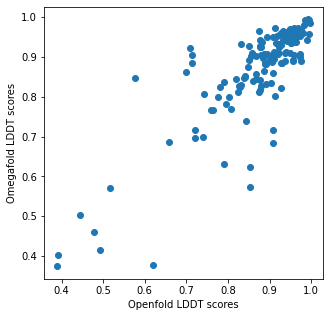

In [434]:
per_protein_lddt_scores_list = [(k,
                                 per_protein_lddt_scores[k]['openfold_ofimpl'],
                                 per_protein_lddt_scores[k]['omegafold_ofimpl'],
                                 per_protein_lddt_scores[k]['openfold_no_templates_ofimpl'],
                                ) for k in per_protein_lddt_scores]
openfold_predictions_lddt_list = [item[1] for item in per_protein_lddt_scores_list]
omegafold_predictions_lddt_list = [item[2] for item in per_protein_lddt_scores_list]
openfold_predictions_no_templates_lddt_list = [item[1] for item in per_protein_lddt_scores_list]
plt.figure(figsize=(5,5))
plt.scatter(openfold_predictions_lddt_list, omegafold_predictions_lddt_list)
plt.xlabel('Openfold LDDT scores')
plt.ylabel('Omegafold LDDT scores')
# for i in range(len(per_protein_lddt_scores_list)):
#     plt.text(x=openfold_predictions_lddt_list[i], y=omegafold_predictions_lddt_list[i], s=per_protein_lddt_scores_list[i][3])
plt.show()

In [424]:
# Does the difference between templates and no_templates the same for both the OF_LDDT implementation and the binary implmentation.
sum(lddt_per_protein_openfold_binaryimpl.values())/len(lddt_per_protein_openfold_binaryimpl), sum(lddt_per_protein_openfold_notemplates_binaryimpl.values())/len(lddt_per_protein_openfold_notemplates_binaryimpl)

(0.8122315068493151, 0.7696979452054795)

Number of proteins:  135
Average LDDTs on the intersection-set of proteins:  tensor(0.8742) tensor(0.8708) tensor(0.8355) tensor(0.9029)


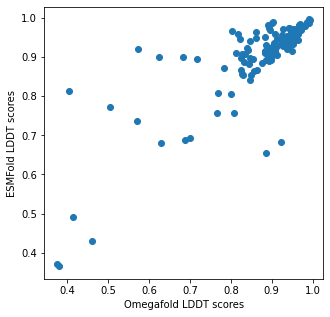

In [449]:
# Comparing whatever ESMFold can predict right now on 16GB GPUs (<530 residue proteins)
per_protein_lddt_scores_list = [(k,
                                 per_protein_lddt_scores[k]['openfold_ofimpl'],
                                 per_protein_lddt_scores[k]['omegafold_ofimpl'],
                                 per_protein_lddt_scores[k]['openfold_no_templates_ofimpl'],
                                 lddt_per_protein_esmfold_ofimpl[k]
                                ) for k in lddt_per_protein_esmfold_ofimpl]
print("Number of proteins: ", len(per_protein_lddt_scores_list))
openfold_predictions_lddt_list = [item[1] for item in per_protein_lddt_scores_list]
omegafold_predictions_lddt_list = [item[2] for item in per_protein_lddt_scores_list]
openfold_predictions_notemplates_lddt_list = [item[3] for item in per_protein_lddt_scores_list]
esmfold_predictions_lddt_list = [item[4] for item in per_protein_lddt_scores_list]
print("Average LDDTs on the intersection-set of proteins: ",
      sum(openfold_predictions_lddt_list)/len(openfold_predictions_lddt_list),
      sum(omegafold_predictions_lddt_list)/len(omegafold_predictions_lddt_list),
      sum(openfold_predictions_notemplates_lddt_list)/len(openfold_predictions_notemplates_lddt_list),
      sum(esmfold_predictions_lddt_list)/len(esmfold_predictions_lddt_list))
plt.figure(figsize=(5,5))
plt.scatter(omegafold_predictions_lddt_list, esmfold_predictions_lddt_list)
plt.xlabel('Omegafold LDDT scores')
plt.ylabel('ESMFold LDDT scores')
# for i in range(len(per_protein_lddt_scores_list)):
#     plt.text(x=openfold_predictions_lddt_list[i], y=esmfold_predictions_lddt_list[i], s=per_protein_lddt_scores_list[i][0])
plt.show()